In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mopet import mopet
from scipy.signal import find_peaks

from synchronization import plots
from synchronization import runner
from synchronization import constants
from synchronization import processing

# ING Network

In this notebook we model two interconnected inhibitory networks. Gamma rhythm is created by ING mechanism.

We explore the effect on noise strength and try to replicate Meng & Rieckes result.

Based on our findings for the ING model, we move forward to the PING model.

**ING network**
* 1000 Neurons in each Network
* Low Recurrent inhibition


In [2]:
params = {
    "runtime": 500.0,
    
    "ou_enabled": [False, False],
    
    "model_EI": False,
    
    "poisson_enabled": [True, True],
    "poisson_variance": 0.5,
    "poisson_p": 0.85,
    "poisson_size": 800,
    "poisson_mean_input": 300,
    "poisson_I_enabled": True,
    "poisson_I_ratio": 1.0,
    
    "N_pop": 2,
    "net_record_spikes": 200,    
    
    # Only Synaptic Strengths for I<->I.
    "J_ppee": 0.0,
    "J_ppei": 0.0,
    "J_ppii": 0.15,
    
    "J_itoi": 0.4,
    "J_etoe": 0.0,
    "J_etoi": 0.0,
    "J_itoe": 0.0,
    
    # Only connectivity for I to I, all-to-all.
    "p_ppee": 0.00,
    "p_ppei": 0.00,
    "p_ppii": 1.0,
    "p_etoi": 0.0,
    "p_etoe": 0,
    "p_itoe": 0.0,
    "p_itoi": 1.0,
    
    "syn_net_inh": True,
    "syn_net_exc": False,
    
    # Time Constants
    "tau_GABA": 20.0,
    
    "const_delay": 0.0,
    
    "N_e": 1,
    "N_i": 1000,
}

## ING Network with weak coupling and weak noise

We expect to see then almost no overlap in the area around the dominant frequency.

In [3]:
params_mid = dict(params)
params_mid.update({
    "runtime": 5000,
    "poisson_variance": 0.5,
    "net_record_spikes": 1000,
    # reduce time decay of GABA
    "tau_GABA": 20.0,    
})

# GABA Decay Values < 40 can still considered be realsitic? (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2666407/)

"""
1. Want to reduce the frequency (not amplitude) and keep a strong ING rhythm
* play around with tau_GABA
* reduce mean noise input
* reduce or increase inhibition?
* Any other time constants?
* Reduce influence between networks? I already see overlap in their frequency bands..

2. Have to analyze if I can keep peak frequency the same with increasing noise strength. Atm peak frequency increases as well, goes up to 80

"""

'\n1. Want to reduce the frequency (not amplitude) and keep a strong ING rhythm\n* play around with tau_GABA\n* reduce mean noise input\n* reduce or increase inhibition?\n* Any other time constants?\n* Reduce influence between networks? I already see overlap in their frequency bands..\n\n2. Have to analyze if I can keep peak frequency the same with increasing noise strength. Atm peak frequency increases as well, goes up to 80\n\n'

In [20]:
model = runner.run(
    modified_params=params_mid,
    file_name="ING_1",
    load=False
)

Starting simulation at t=0. s for a duration of 5. s
1.3425 s (26%) simulated in 10s, estimated 27s remaining.
2.69215 s (53%) simulated in 20s, estimated 17s remaining.
4.04845 s (80%) simulated in 30s, estimated 7s remaining.
5. s (100%) simulated in 38s


Global Order Parameter value of: 0.6704086918224059
Mean Phase Coherence 0.2733914581387726
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.8913627389370286
Within Synchronization of Network 2 0.895536174985185


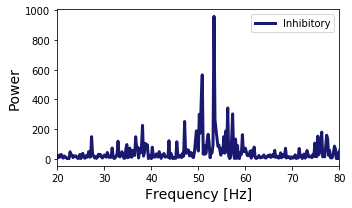

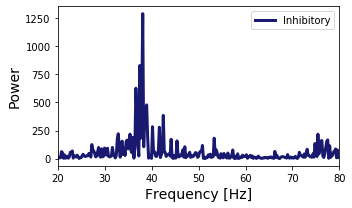

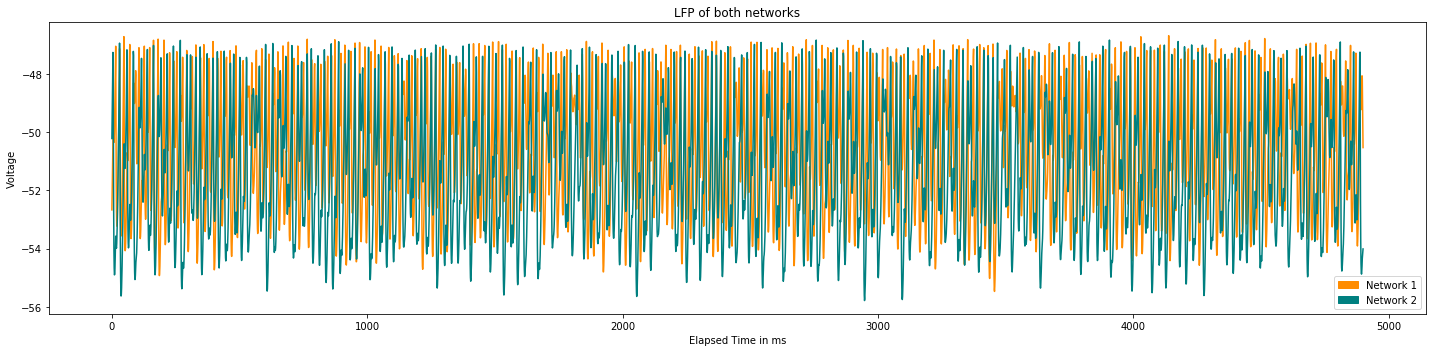

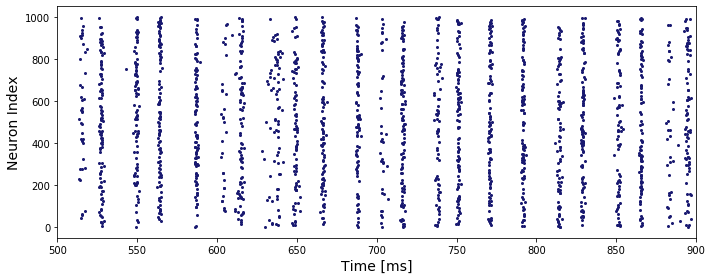

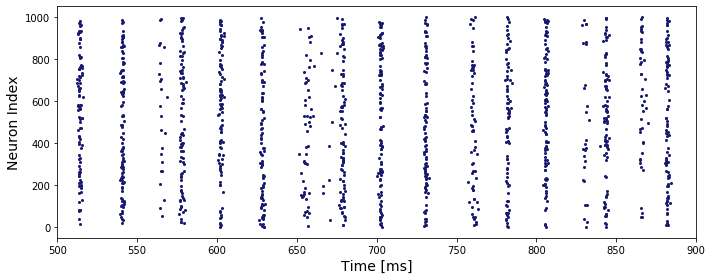

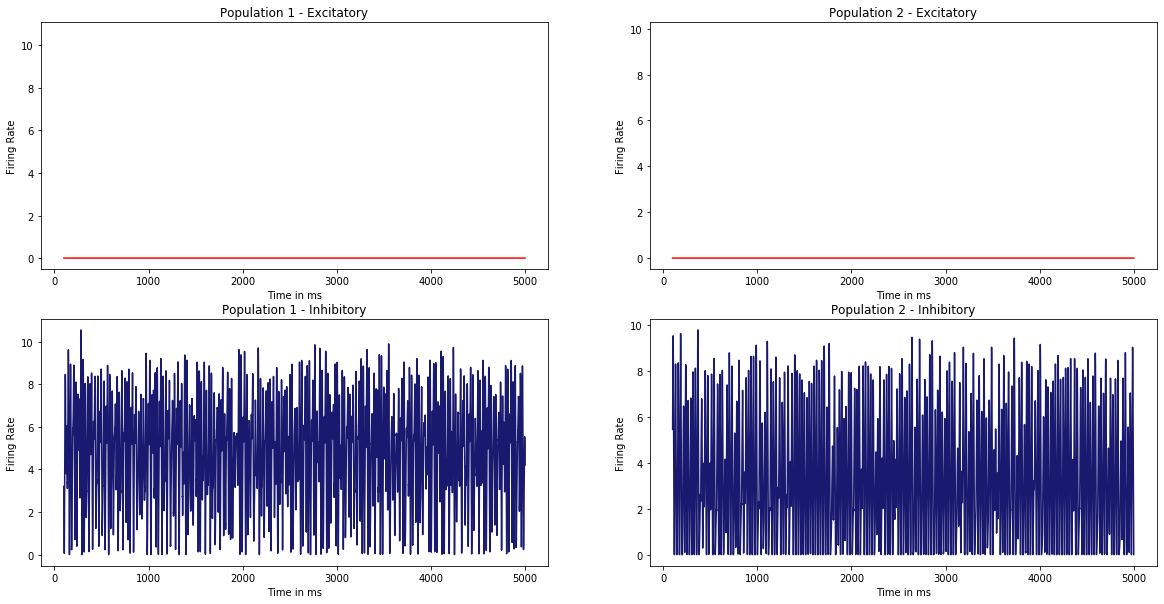

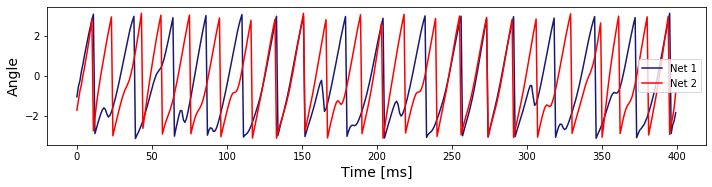

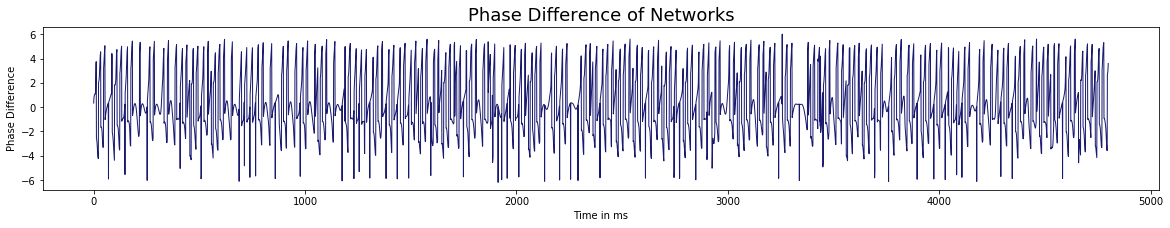

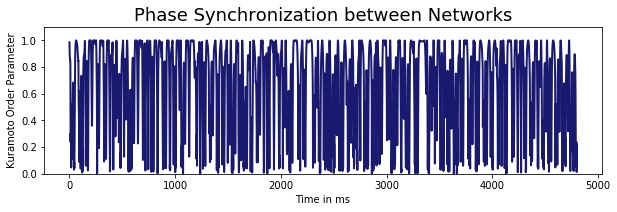

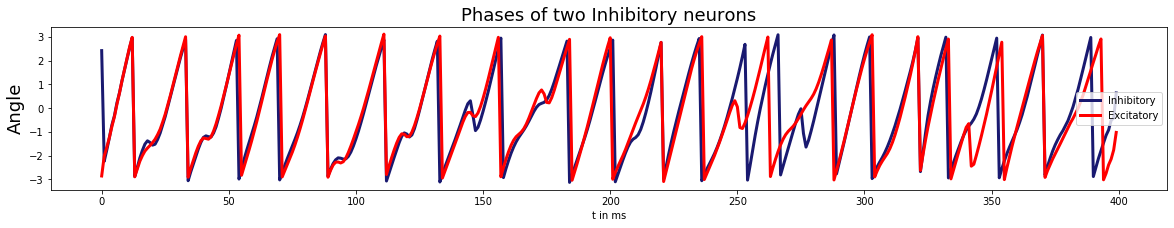

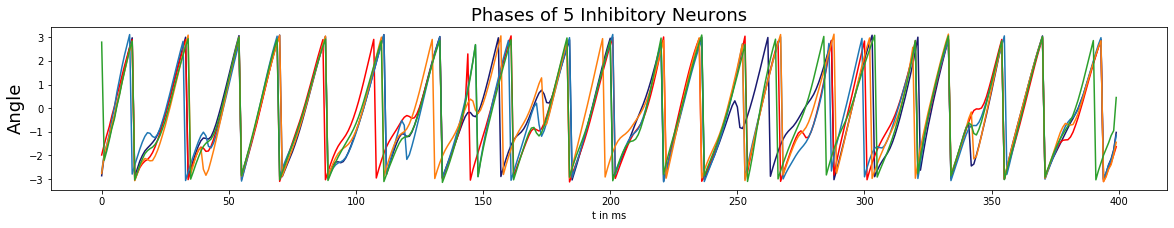

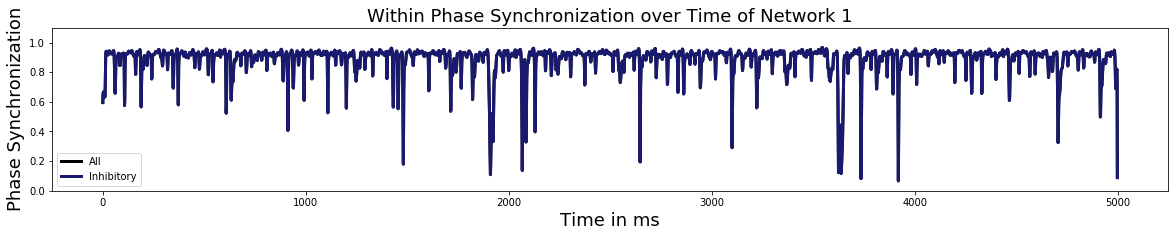

In [21]:
plots.plot_results(model, full_raster=False, psd_group="INH", x_max_psd=80, x_min_psd=20, folder="ING_weak_noise", save=True, phase_analysis=True)

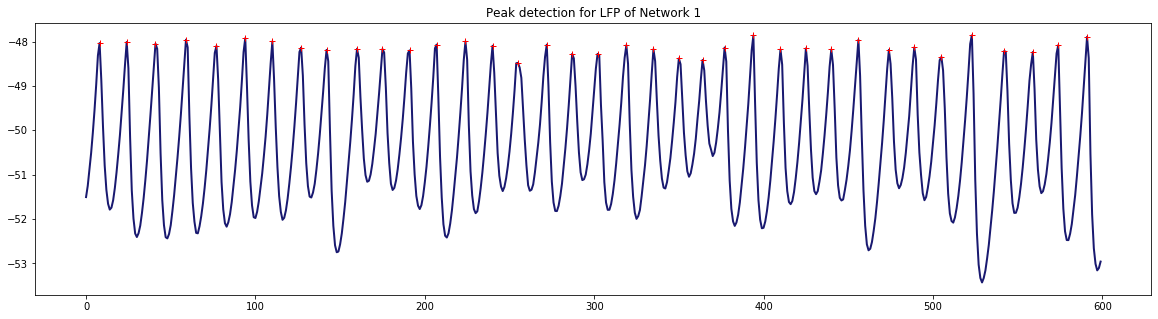

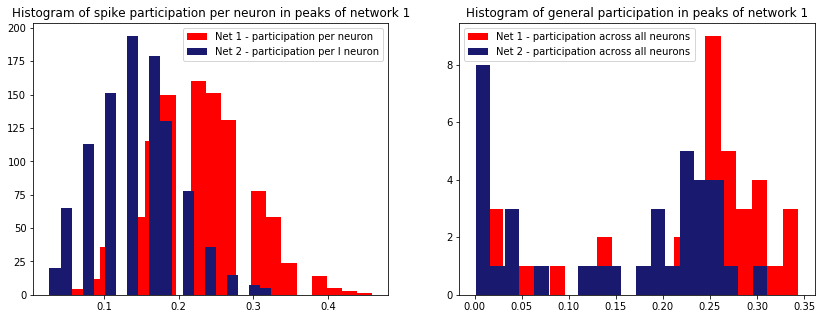

In [6]:
plots.spike_participation_histograms(model)

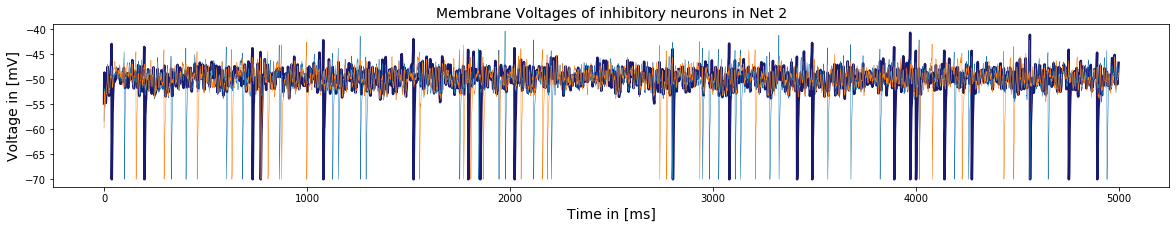

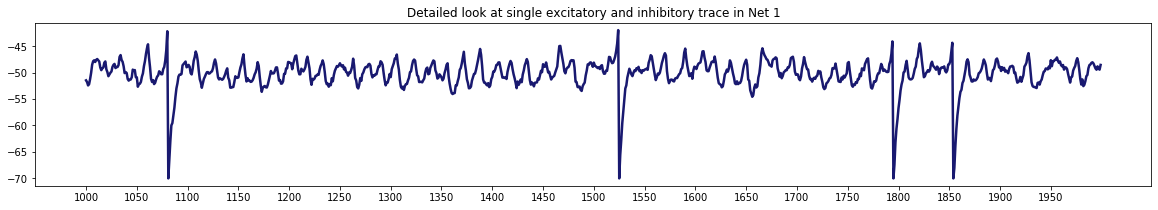

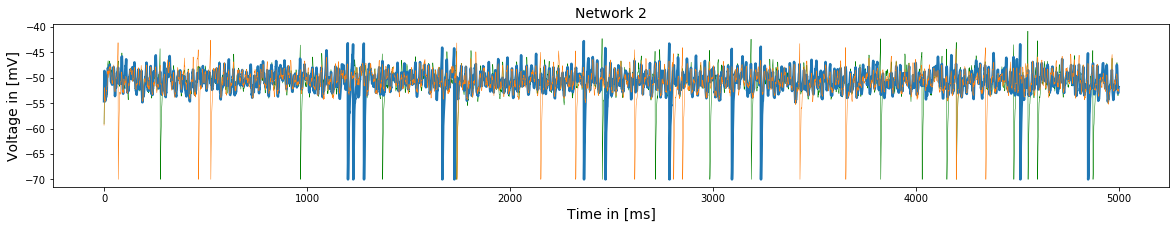

In [20]:
plots.membrane_potentials_sample(model, detail_window=(1000, 2000))

49
951


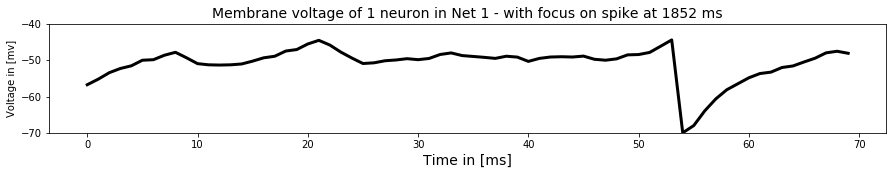

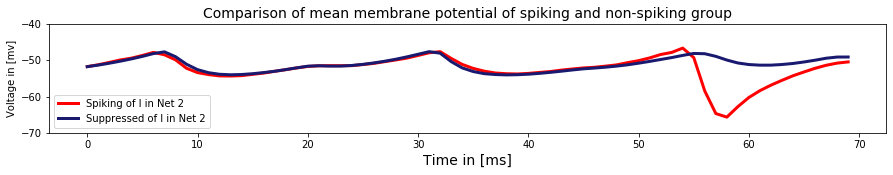

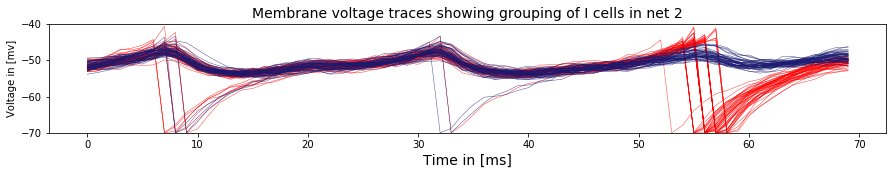

In [22]:
w = (1800, 1870)

v = model["v_all_neurons_i1"]
v2 = model["v_all_neurons_i2"]

plots.spike_variability_analysis(v, v2, window=w, t_s=1852, t_width=(6, 6))

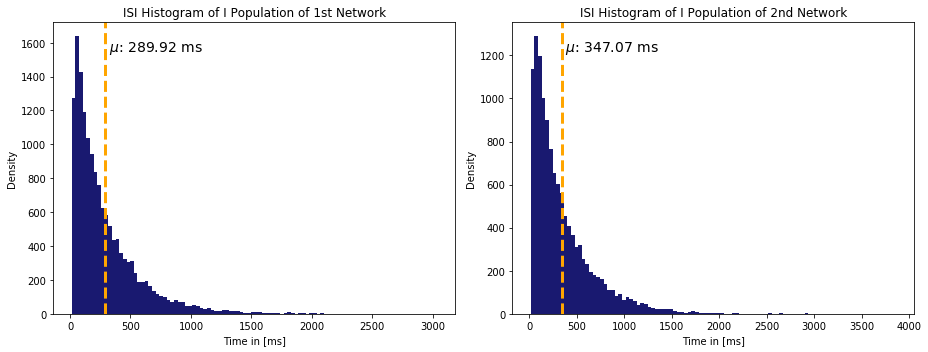

In [60]:
plots.isi_histograms(model, bins=100, filter_outlier=False, folder="ING", key="normal")

## Synchronizing both networks by increasing network coupling

Increased network coupling will synchronize both networks.

### Small Increase in network coupling -> we see first effects

Starting simulation at t=0. s for a duration of 5. s
1.32885 s (26%) simulated in 10s, estimated 28s remaining.
2.59305 s (51%) simulated in 20s, estimated 19s remaining.
3.92035 s (78%) simulated in 30s, estimated 8s remaining.
5. s (100%) simulated in 38s


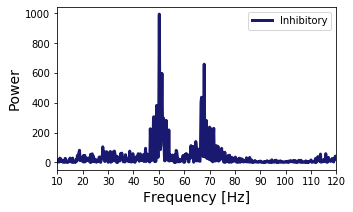

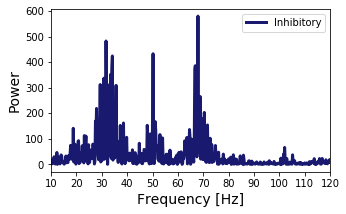

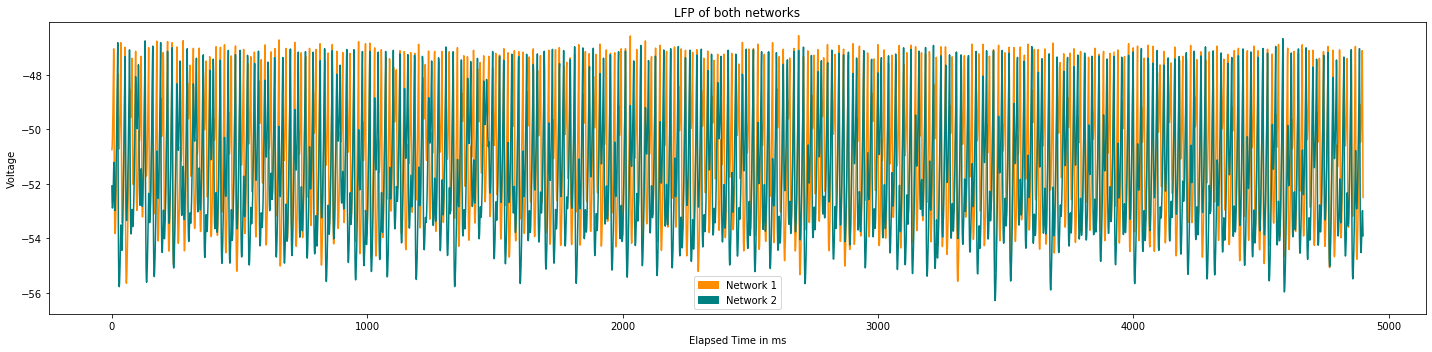

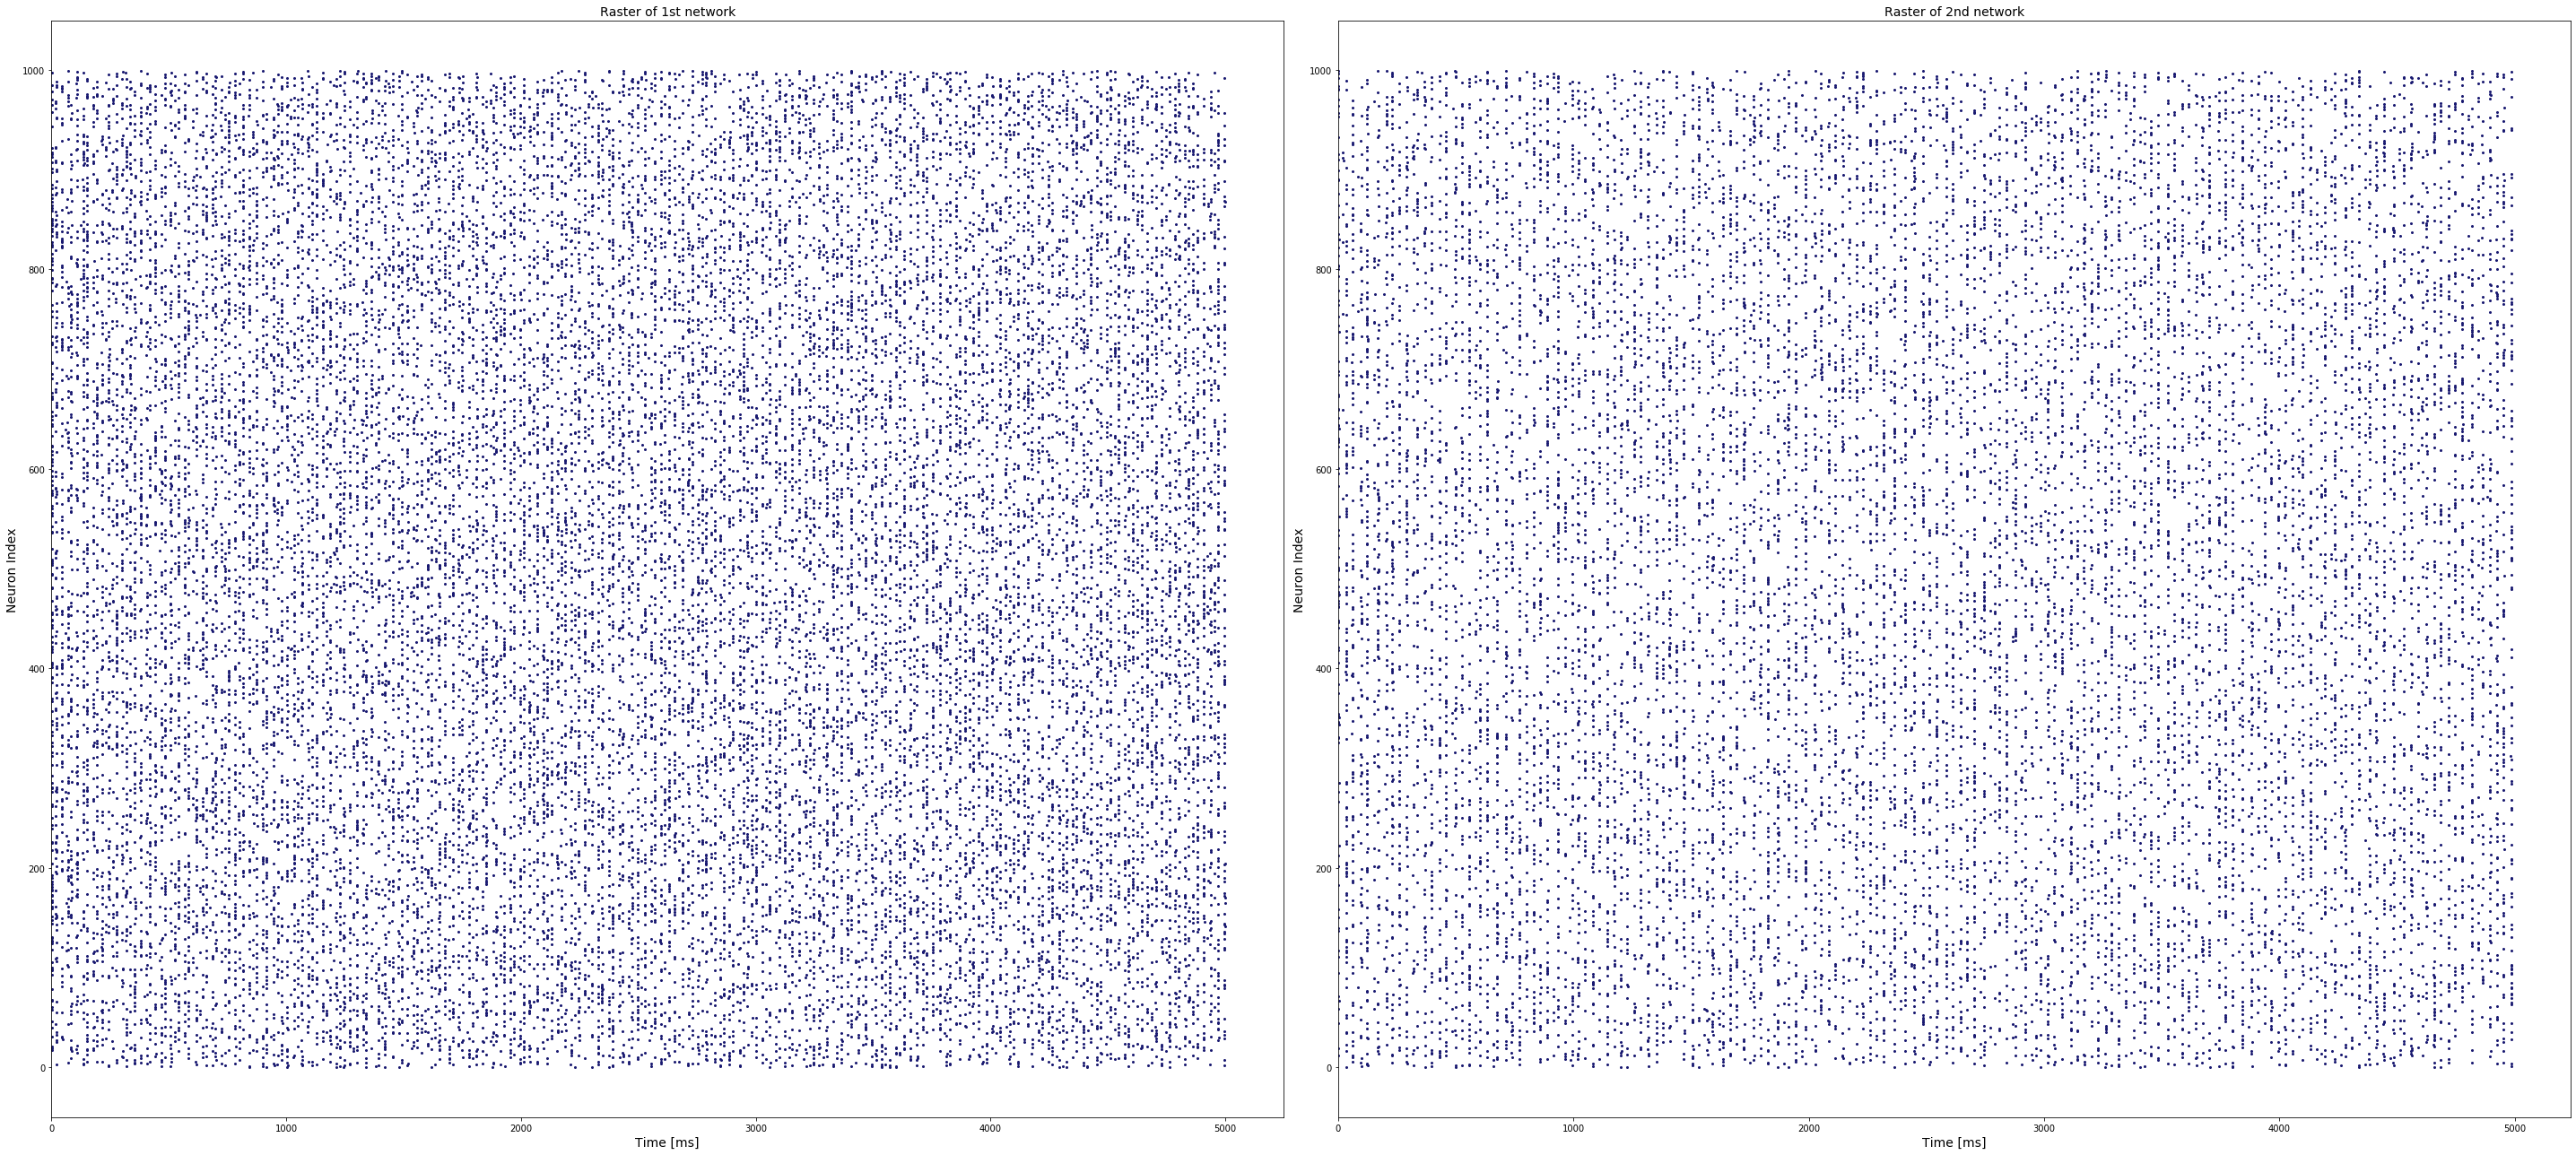

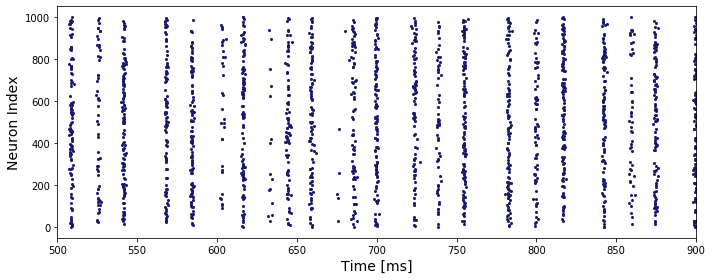

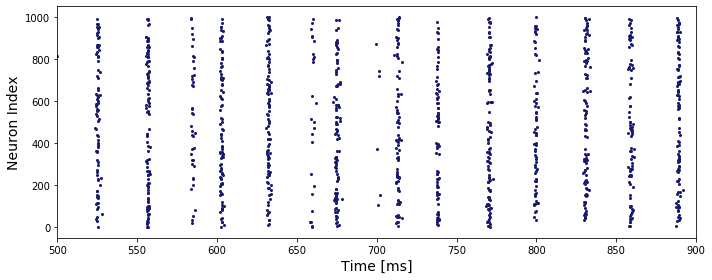

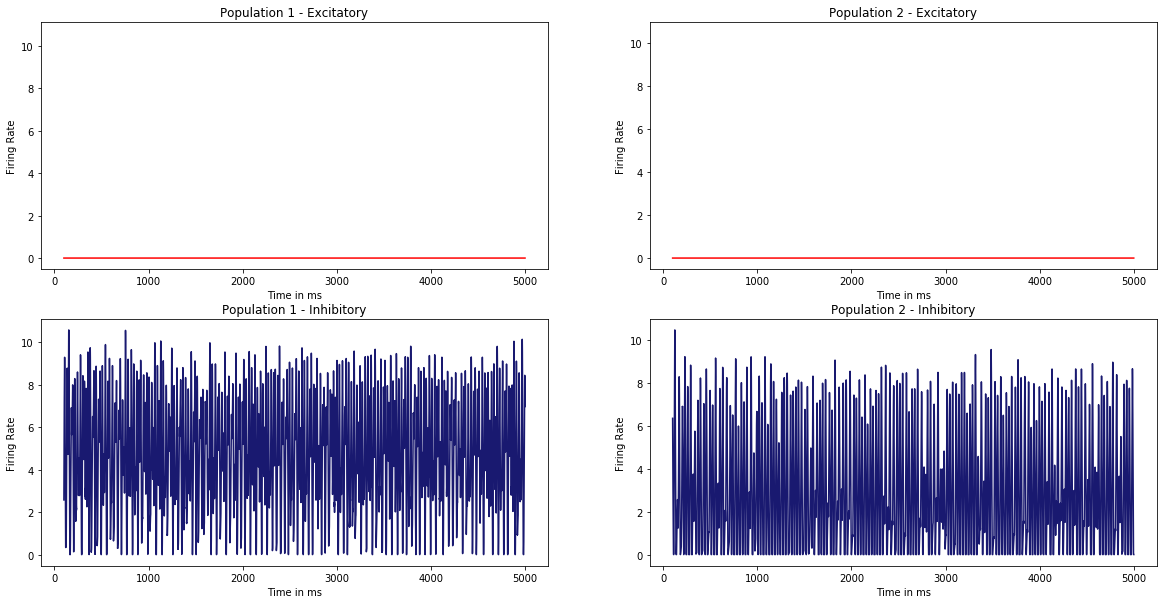

In [40]:
synch = dict(params)
synch.update({
    "runtime": 5000,
    "J_ppii": 0.2,
    "poisson_variance": 0.5,
    "net_record_spikes": 1000,    
})
model = runner.run(
    modified_params=synch
)

plots.plot_results(model, full_raster=True, psd_group="INH")

### Further increase in network coupling leads to 1:1 entrainment

In [16]:
synch = dict(params)
synch.update({
    "runtime": 5000,
    "J_ppii": 0.3,
    "poisson_variance": 0.5,
    "net_record_spikes": 1000,     
})

model = runner.run(
    modified_params=synch,
    file_name="ING_coupling",
    load=False
)

Starting simulation at t=0. s for a duration of 5. s
1.427 s (28%) simulated in 10s, estimated 25s remaining.
2.76985 s (55%) simulated in 20s, estimated 16s remaining.
4.1245 s (82%) simulated in 30s, estimated 6s remaining.
5. s (100%) simulated in 36s


Global Order Parameter value of: 0.9953542454437426
Mean Phase Coherence 0.9971656916115151
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.9335708183883462
Within Synchronization of Network 2 0.9751399531462188


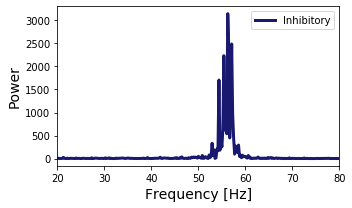

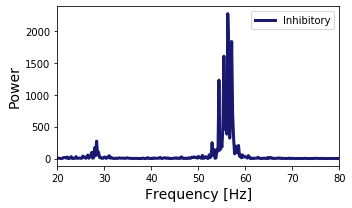

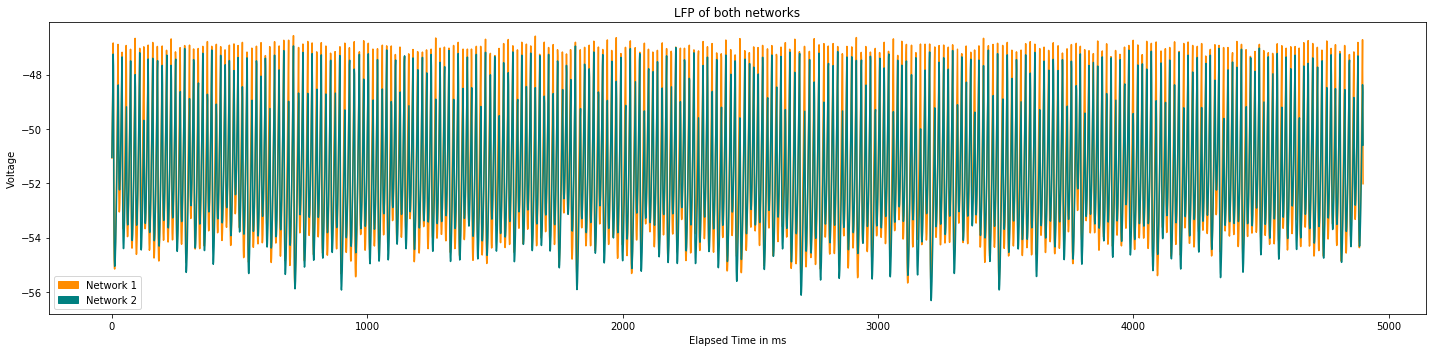

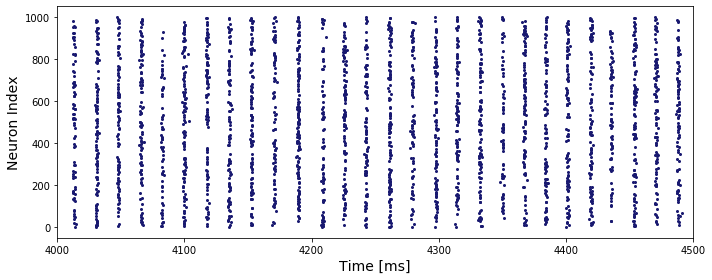

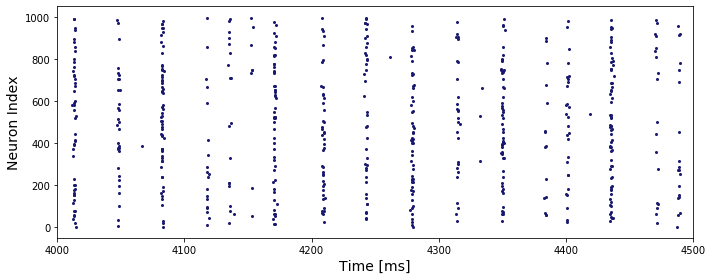

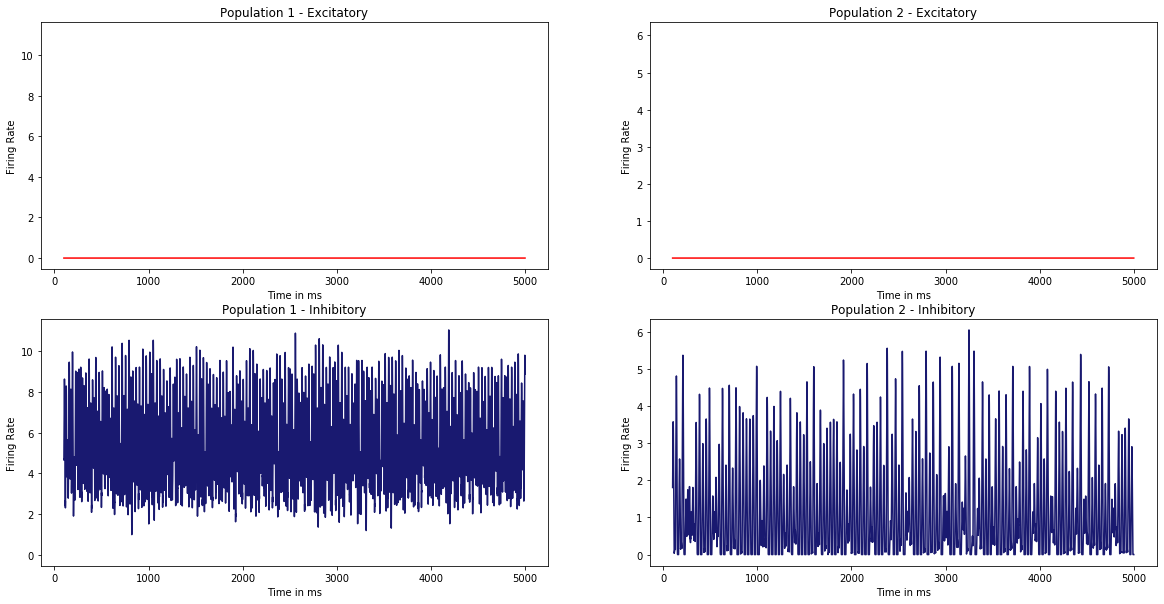

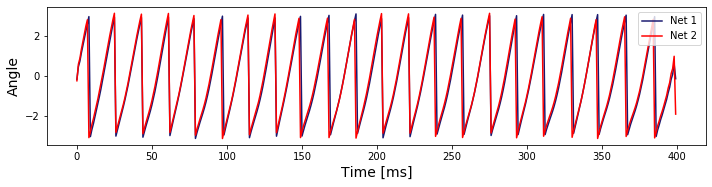

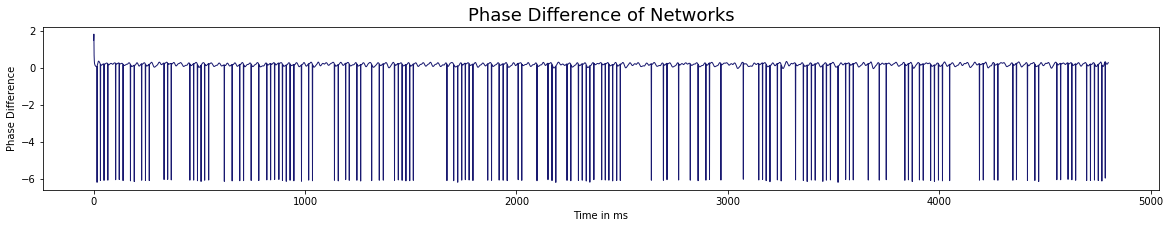

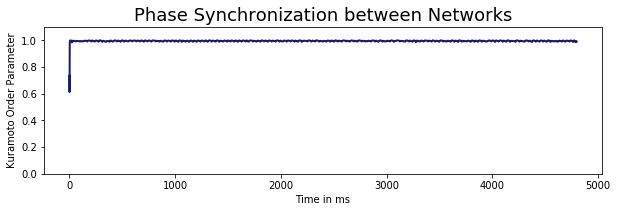

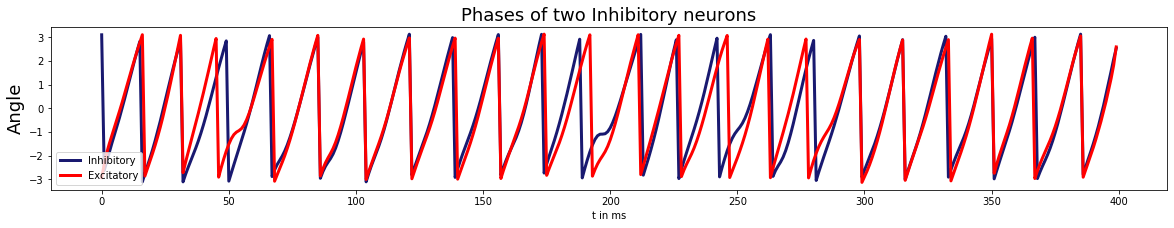

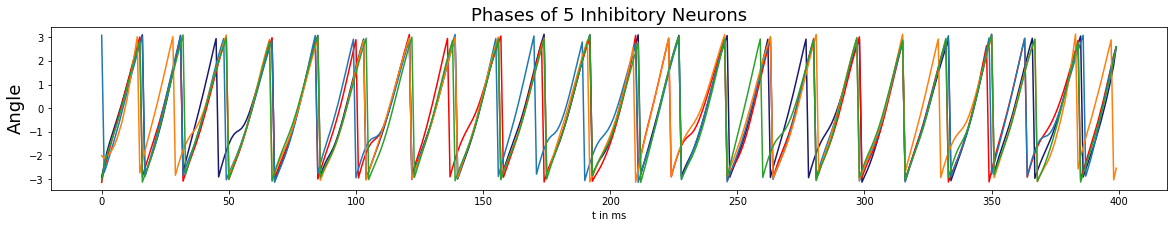

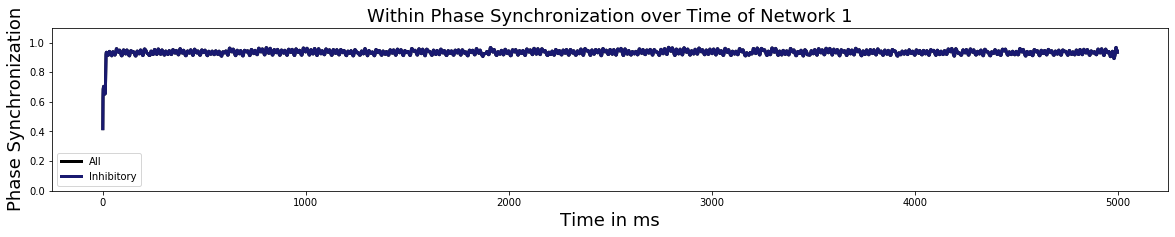

In [18]:
plots.plot_results(model, full_raster=False, psd_group="INH", x_max_psd=80, x_min_psd=20, raster_right=2000, folder="ING_strong_coupling", save=True, phase_analysis=True, excerpt_x_left=4000, excerpt_x_right=4500)

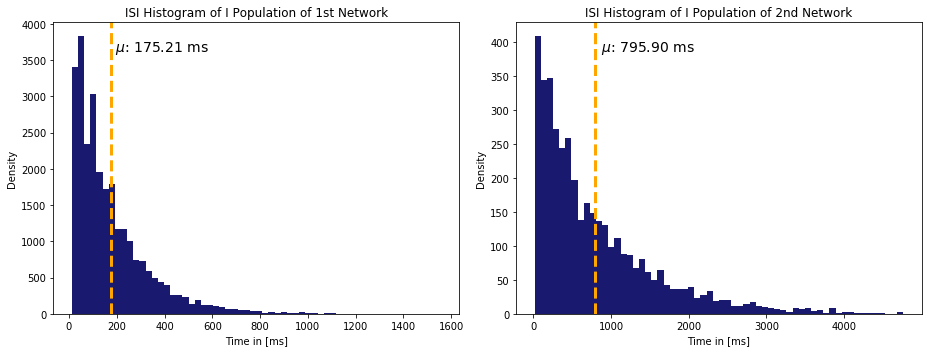

In [11]:
plots.isi_histograms(model)

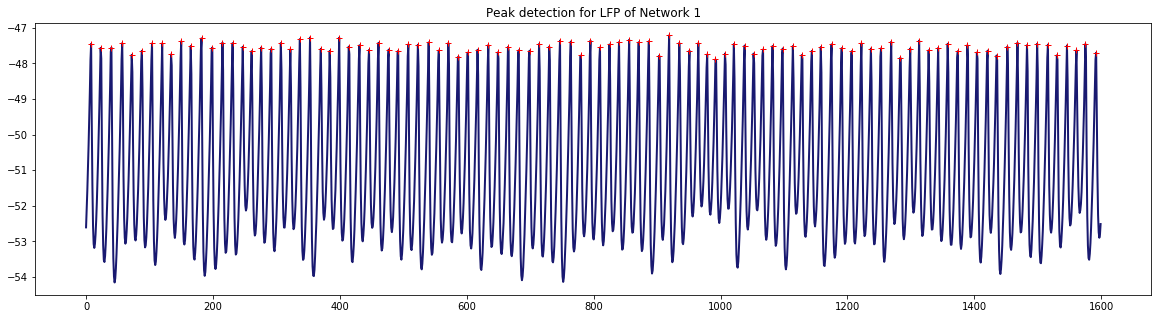

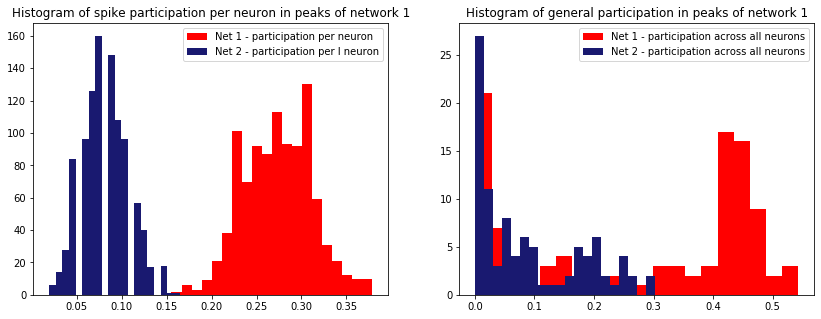

In [12]:
plots.spike_participation_histograms(model)

## Increase in noise leads to synchronization!

In [26]:
synch = dict(params)
synch.update({
    "runtime": 20000,
    "poisson_variance": 1.5,
    "net_record_spikes": 1000,  
})

model = runner.run(
    modified_params=synch,
    file_name="ING-noise-synch",
    load=False
)

Starting simulation at t=0. s for a duration of 20. s
1.35455 s (6%) simulated in 10s, estimated 2m 18s remaining.
2.70765 s (13%) simulated in 20s, estimated 2m 8s remaining.
4.06015 s (20%) simulated in 30s, estimated 1m 58s remaining.
5.41515 s (27%) simulated in 40s, estimated 1m 48s remaining.
6.7642 s (33%) simulated in 50s, estimated 1m 38s remaining.
8.13065 s (40%) simulated in 1m 0s, estimated 1m 28s remaining.
9.4778 s (47%) simulated in 1m 10s, estimated 1m 18s remaining.
10.842 s (54%) simulated in 1m 20s, estimated 1m 8s remaining.
12.2033 s (61%) simulated in 1m 30s, estimated 58s remaining.
13.5679 s (67%) simulated in 1m 40s, estimated 47s remaining.
14.9141 s (74%) simulated in 1m 50s, estimated 38s remaining.
16.26905 s (81%) simulated in 2m 0s, estimated 28s remaining.
17.61785 s (88%) simulated in 2m 10s, estimated 18s remaining.
18.9827 s (94%) simulated in 2m 20s, estimated 8s remaining.
20. s (100%) simulated in 2m 27s


Global Order Parameter value of: 0.8740543999681838
Mean Phase Coherence 0.618845456500797
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.614794494516616
Within Synchronization of Network 2 0.579779341997989


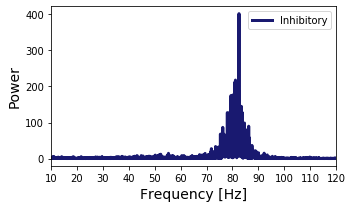

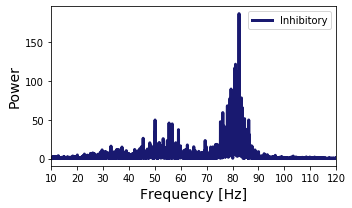

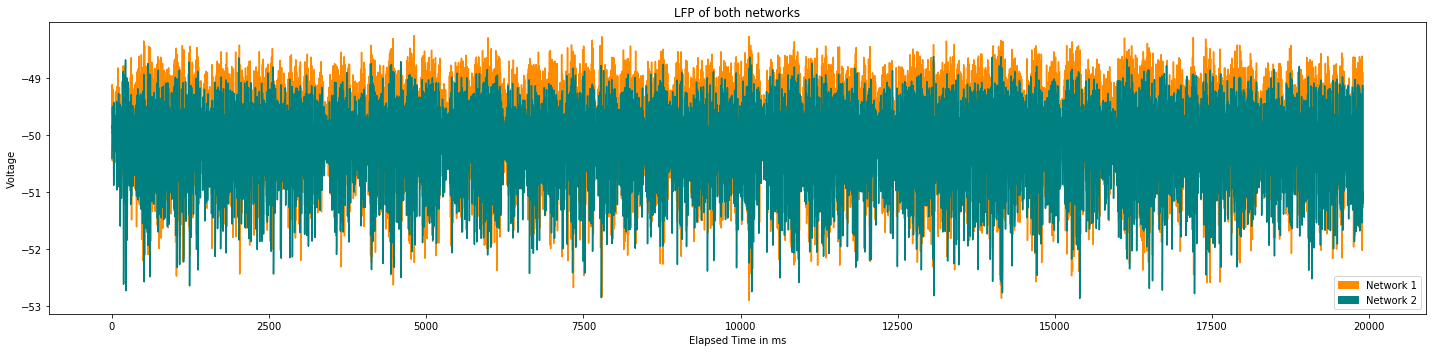

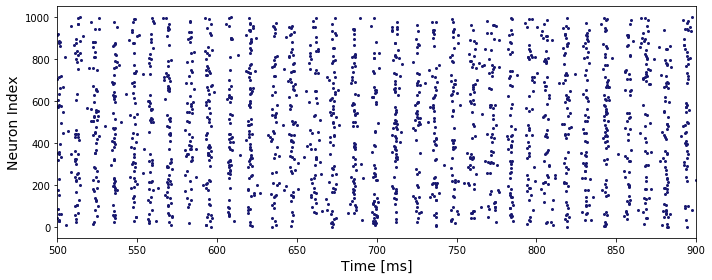

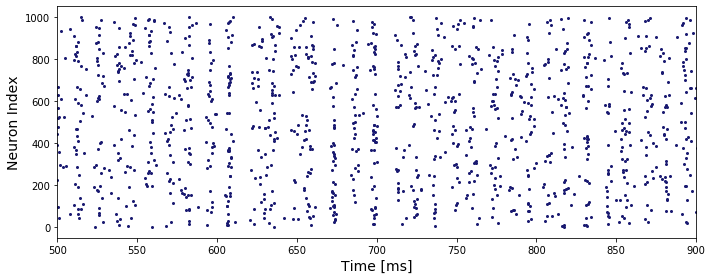

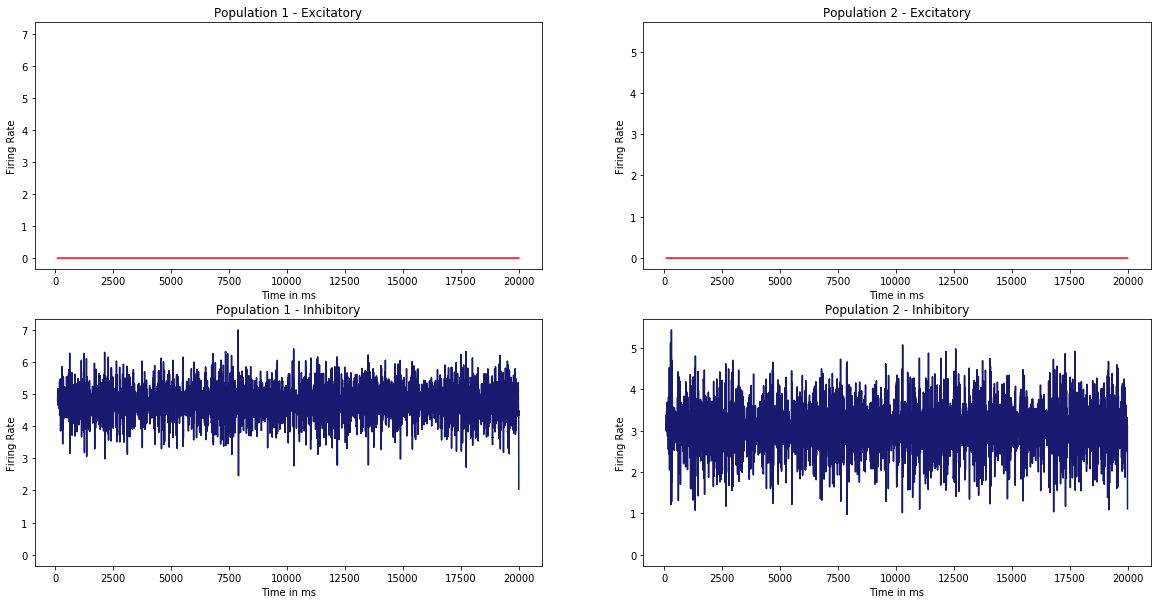

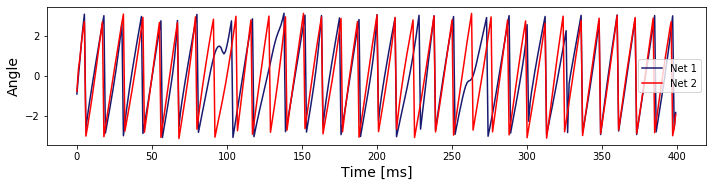

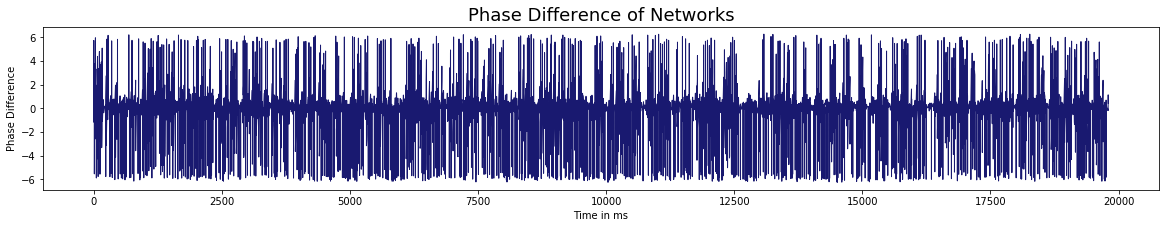

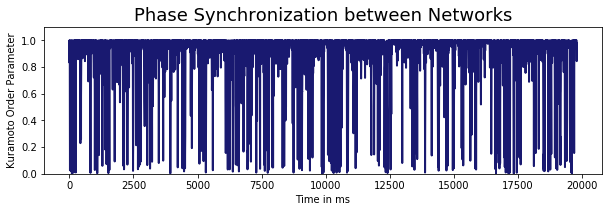

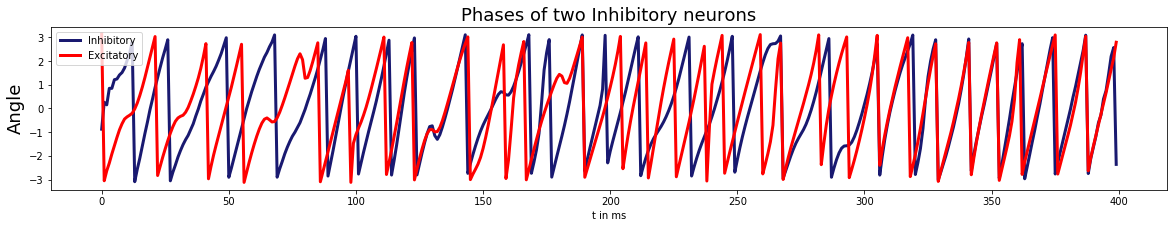

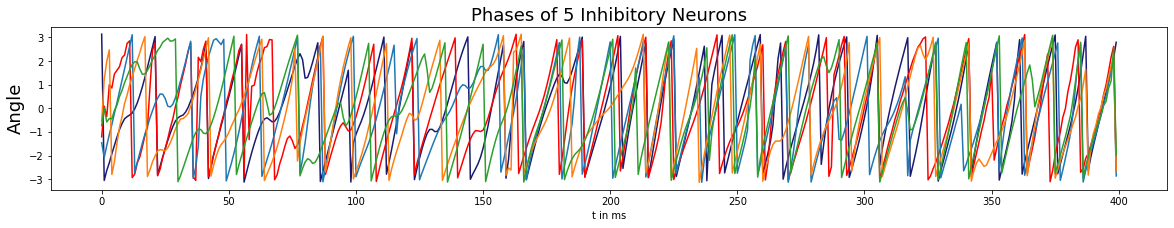

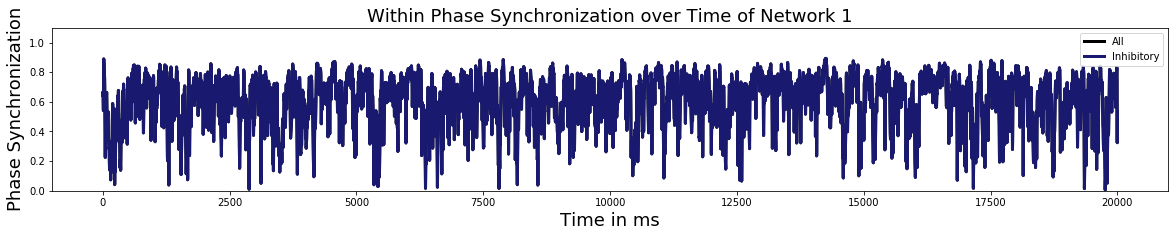

In [27]:
plots.plot_results(model, full_raster=False, psd_group="INH", raster_right=1000, folder="ING_strong_noise", save=True, phase_analysis=True)

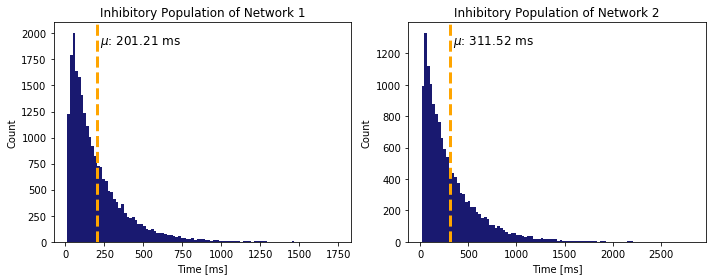

In [13]:
plots.isi_histograms(model, bins=100, folder="ING", key="noise_synch")

#### Spike Variability of I neurons explain synchronization

Only a fraction of neurons participate in each cycle, this allows the slower network 2 to speedend to the frequency of network 1. 

**How?** Once I cells fire in Net 1 inhbition is propagated to Net 2 surpressing a fraction of the I cells. Once inhibitory delay wears of, I cells in net 1 fire again together with the fraction of net 2 that has been surpressed.
However, the other fraction does not fire as they are now surpressed by inhibition.

The increased noise strength increases the membrane voltage heterogenity in both networks, so that the inhibition of I cells in net 1 is significantly more likely to surpress some of the neurons in net 2, while other neurons fire as inhibiton is not strong enough.

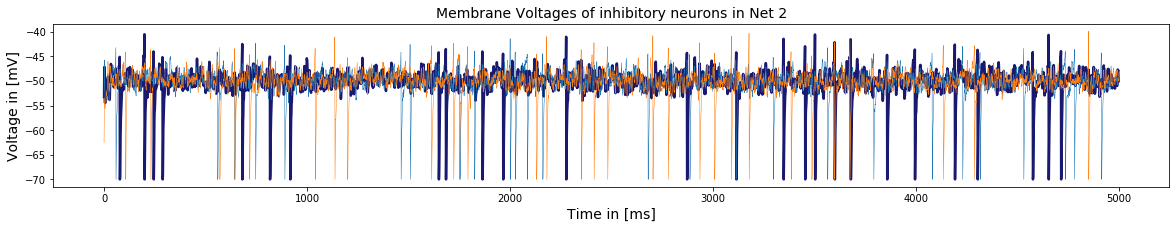

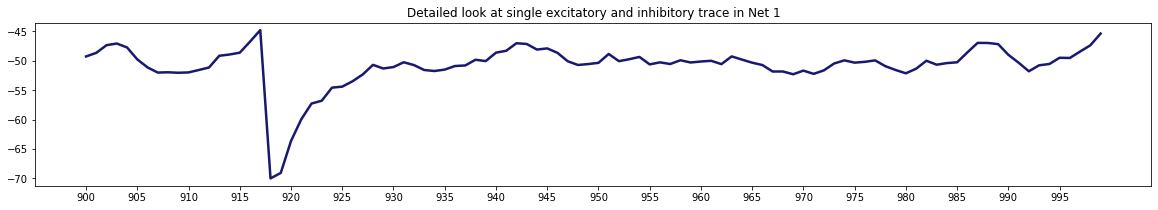

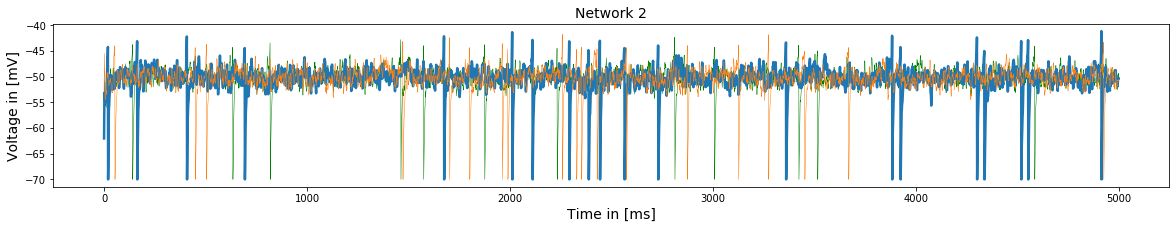

In [70]:
plots.membrane_potentials_sample(model)

-70.0 1865.0
21
979


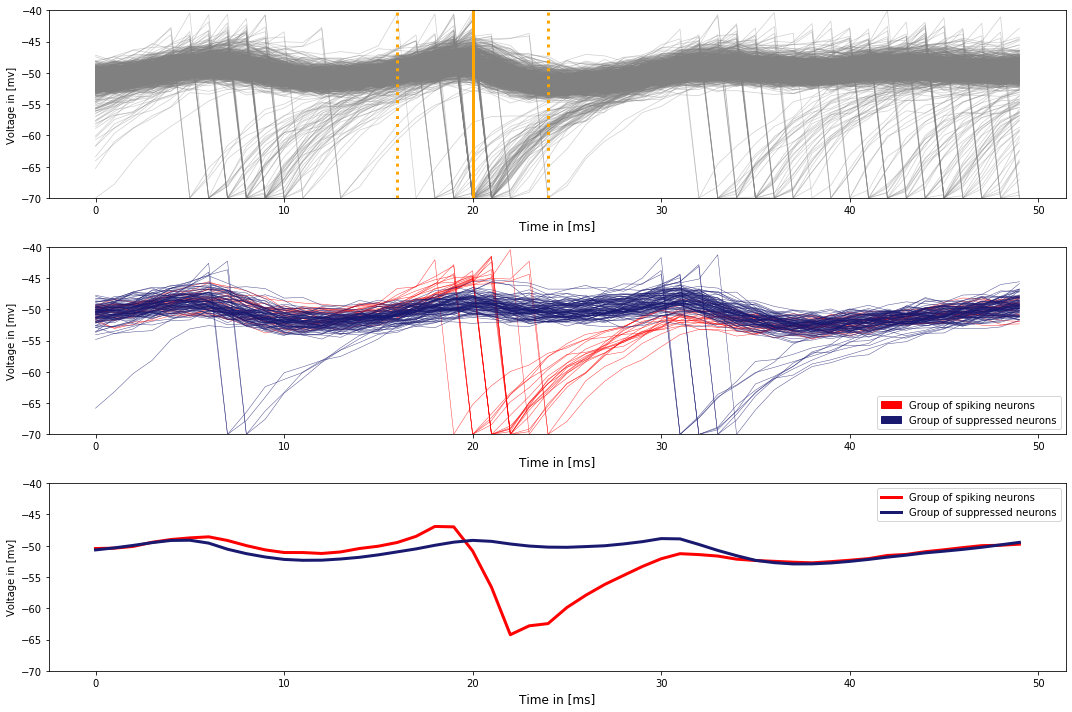

In [117]:
v = model["v_all_neurons_i1"]
v2 = model["v_all_neurons_i2"]
t = model["t_all_neurons_i1"]

# window = (940, 970)
w = (1800, 2000)
v_s, t_s = processing.get_first_spike(v, t, window=w)
print(v_s, t_s)

window = (int(t_s - 20), int(t_s + 30))

plots.spike_variability_analysis(v, v2, window=window, t_s=t_s, t_width=(4, 4), folder="ING", key="noise_synch")

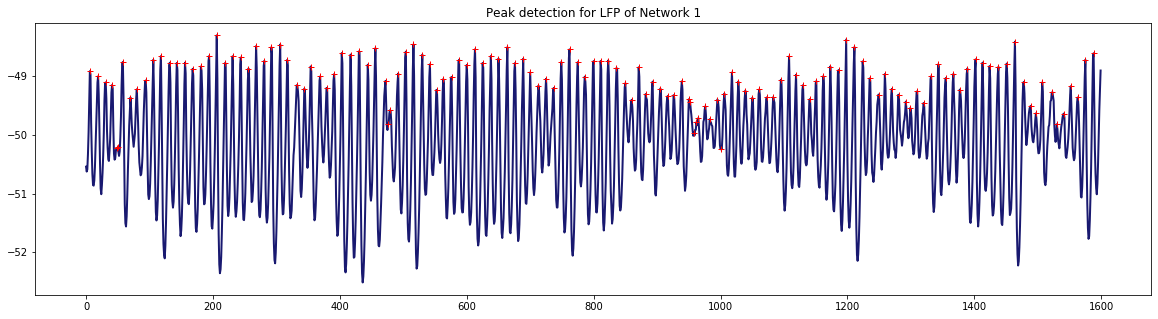

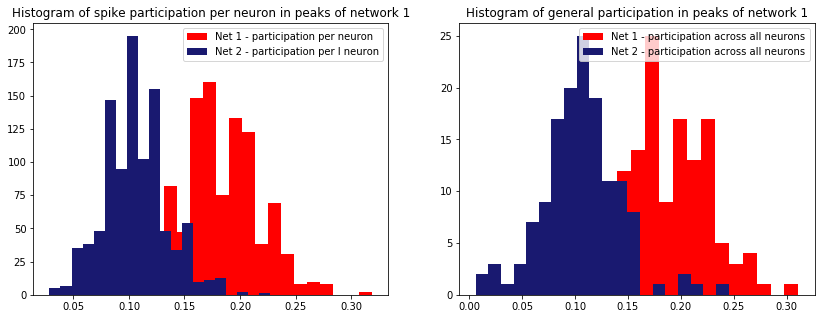

In [33]:
plots.spike_participation_histograms(model)

## Strong Coupling and Strong Noise

Synchronized, maybe a little bit noiser compared to weak noise, but no significant difference.

In [4]:
synch = dict(params)
synch.update({
    "runtime": 1000,
    "poisson_variance": 1.5,
    "poisson_p": 0.84,
    "J_ppii": 0.3,
    "net_record_spikes": 1000,
})

model = runner.run(
    modified_params=synch,
    file_name="ING-str-coupling-str-noise",
    load=False
)

Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 7s


Global Order Parameter value of: 0.9881679107910227
Mean Phase Coherence 0.9878239127594027
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.6904653481500013
Within Synchronization of Network 2 0.7106526163860472


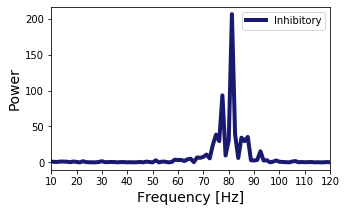

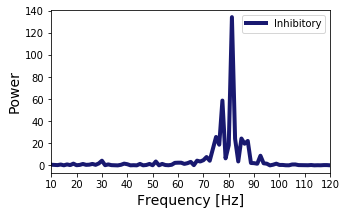

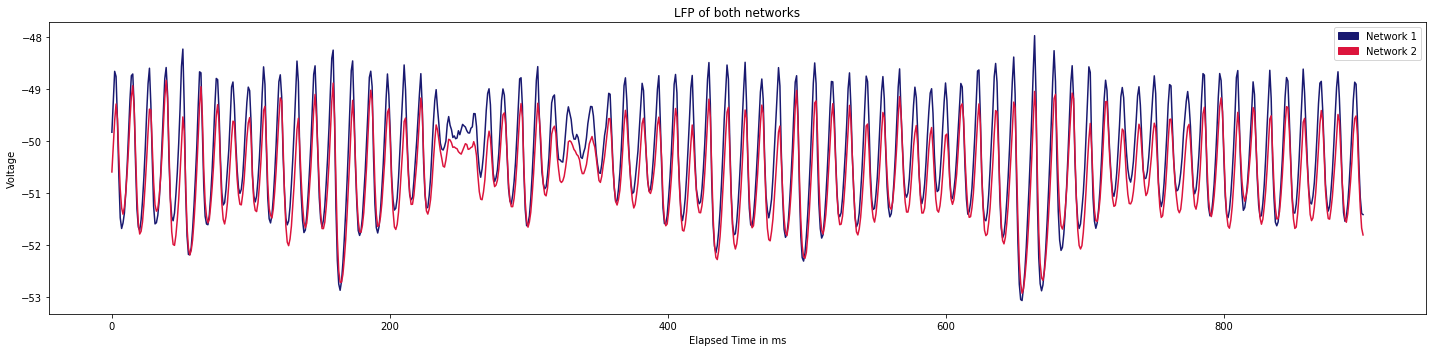

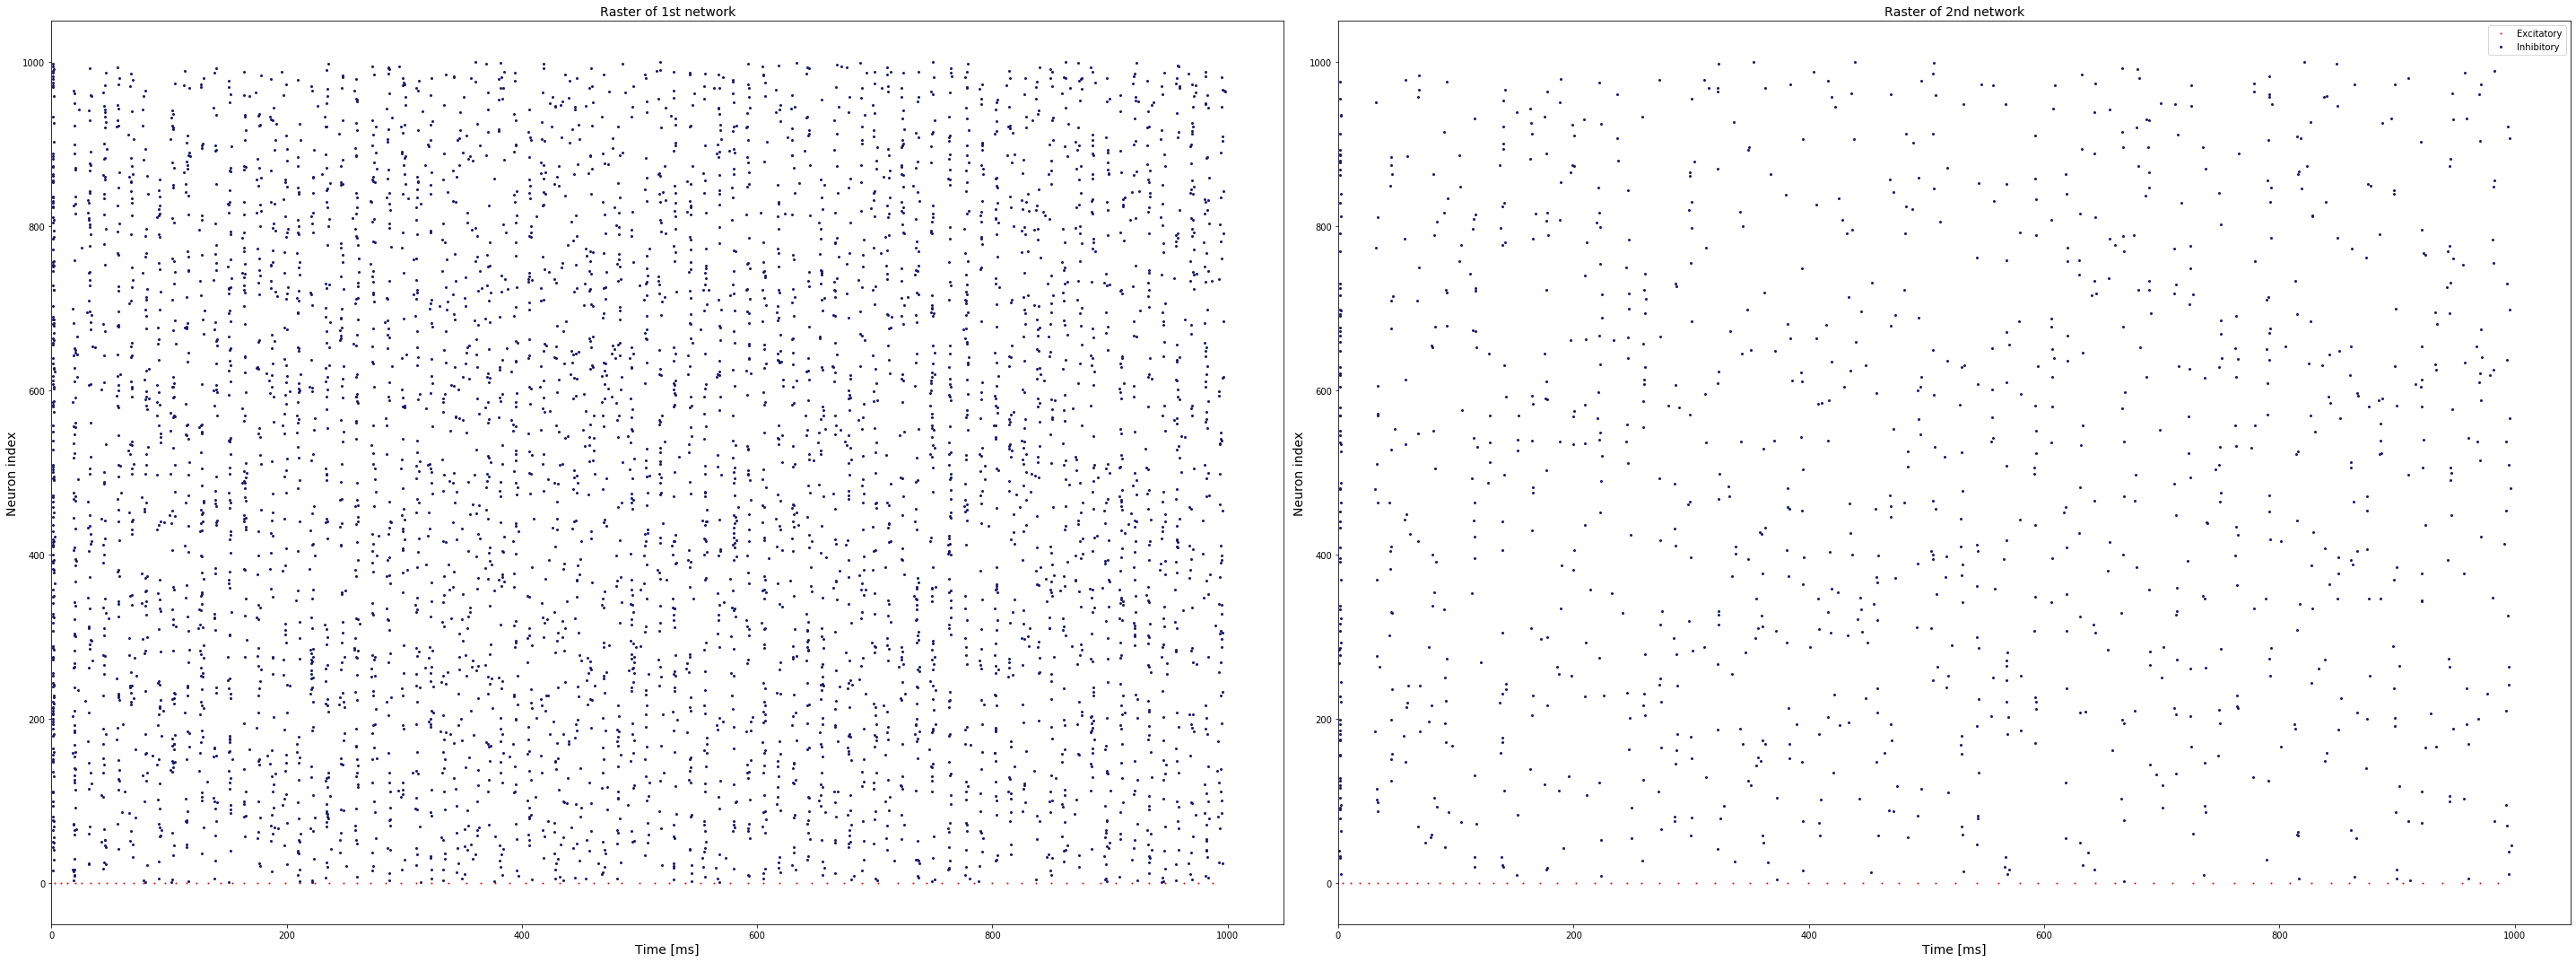

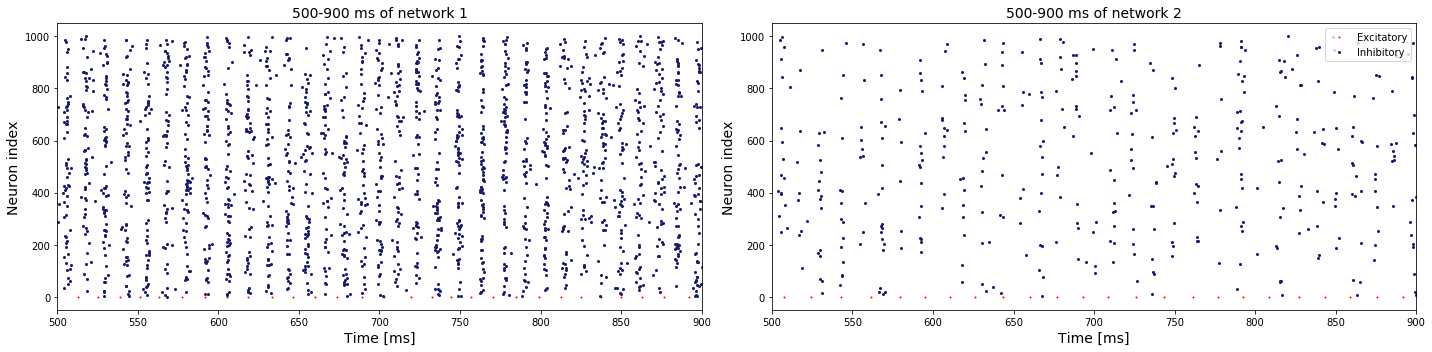

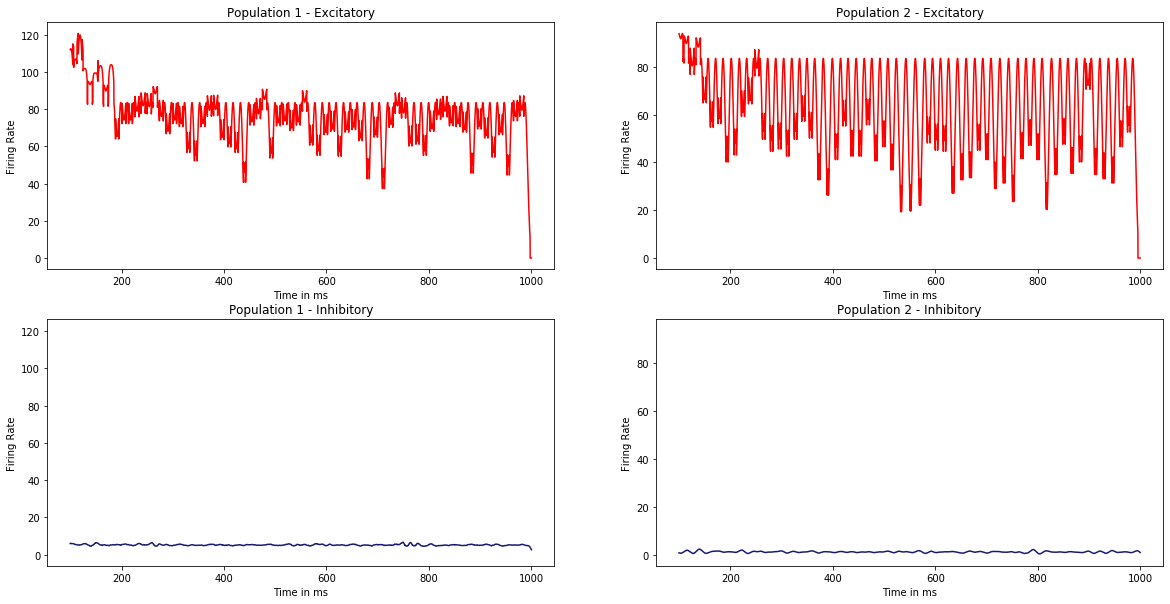

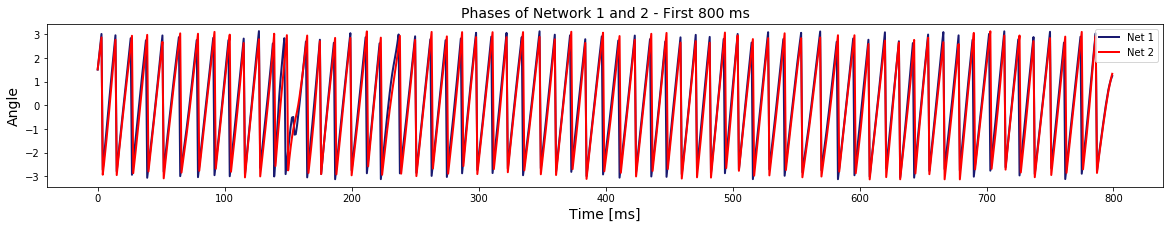

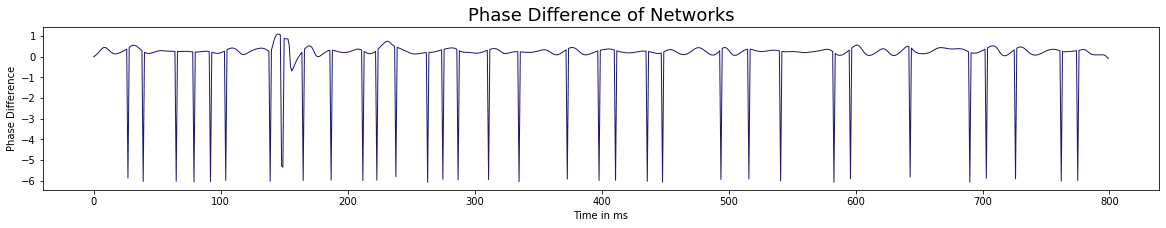

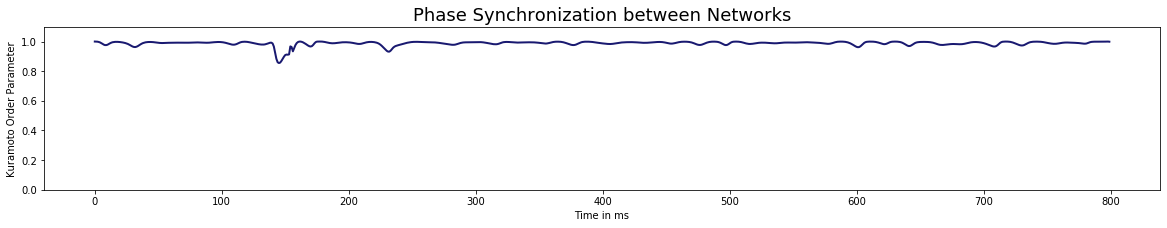

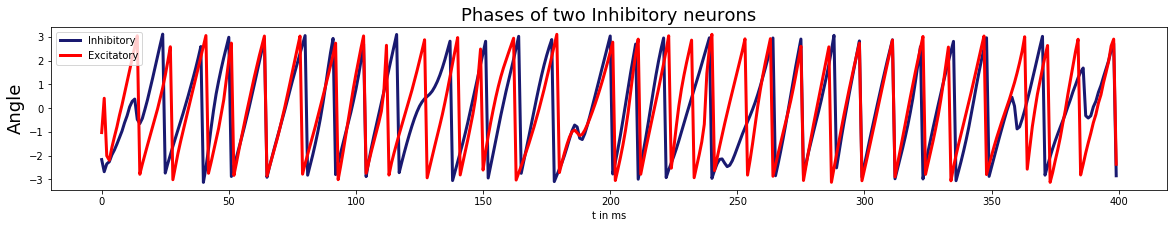

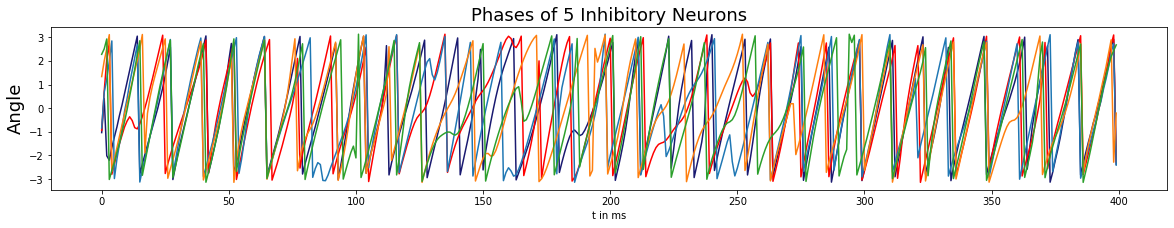

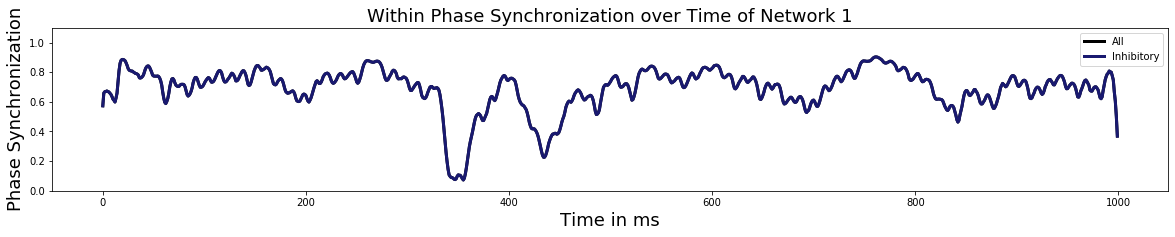

In [9]:
plots.plot_results(model, full_raster=True, psd_group="INH", phase_analysis=True)

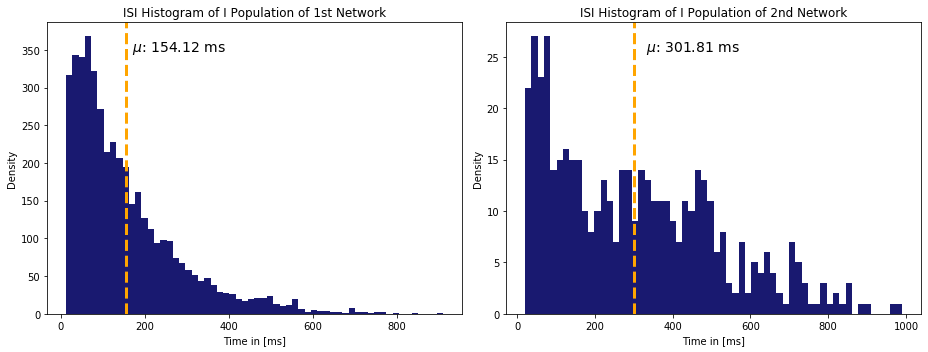

In [7]:
plots.isi_histograms(model)

# Exploration

## Exploration over Noise Strength 1d

In [28]:
exp_params = {
    "poisson_variance": np.arange(0.5, 4.0, 0.1),
}

ov_params = dict(params)
ov_params.update({
    "runtime": 5000.0,
    "const_delay": 0.0,
    "poisson_p": 0.85,
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/ING_synch_noise_1d.h5",
    # exp_7 is default
    exploration_name="exp_7"
)

In [4]:
ex.run()

2020-09-04 12:27:46,332	INFO resource_spec.py:212 -- Starting Ray with 13.87 GiB memory available for workers and up to 6.95 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-09-04 12:27:46,565	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-09-04 12:27:46,815	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 35 jobs.
100%|██████████| 35/35 [00:00<00:00, 988.14it/s]
INFO:root:Runs took 0.039314985275268555 s to submit.
  0%|          | 0/35 [00:00<?, ?it/s]

(pid=14625) Starting simulation at t=0. s for a duration of 5. s
(pid=14628) Starting simulation at t=0. s for a duration of 5. s
(pid=14629) Starting simulation at t=0. s for a duration of 5. s
(pid=14630) Starting simulation at t=0. s for a duration of 5. s
(pid=14624) Starting simulation at t=0. s for a duration of 5. s
(pid=14627) Starting simulation at t=0. s for a duration of 5. s
(pid=14626) Starting simulation at t=0. s for a duration of 5. s
(pid=14623) Starting simulation at t=0. s for a duration of 5. s
(pid=14632) Starting simulation at t=0. s for a duration of 5. s
(pid=14634) Starting simulation at t=0. s for a duration of 5. s
(pid=14633) Starting simulation at t=0. s for a duration of 5. s
(pid=14631) Starting simulation at t=0. s for a duration of 5. s
(pid=14625) 0.5587 s (11%) simulated in 10s, estimated 1m 19s remaining.
(pid=14628) 0.54735 s (10%) simulated in 10s, estimated 1m 21s remaining.
(pid=14629) 0.53625 s (10%) simulated in 10s, estimated 1m 23s remaining.

  3%|▎         | 1/35 [02:56<1:40:17, 176.98s/it]

(pid=14625) Starting simulation at t=0. s for a duration of 5. s


  9%|▊         | 3/35 [02:58<46:26, 87.08s/it]   

(pid=14629) Starting simulation at t=0. s for a duration of 5. s


 20%|██        | 7/35 [03:02<10:15, 22.00s/it]

(pid=14628) Starting simulation at t=0. s for a duration of 5. s


 34%|███▍      | 12/35 [03:05<01:36,  4.20s/it]

(pid=14624) Starting simulation at t=0. s for a duration of 5. s
(pid=14625) 293.75 ms (5%) simulated in 10s, estimated 2m 40s remaining.
(pid=14629) 306. ms (6%) simulated in 10s, estimated 2m 33s remaining.
(pid=14626) Starting simulation at t=0. s for a duration of 5. s
(pid=14632) Starting simulation at t=0. s for a duration of 5. s
(pid=14627) Starting simulation at t=0. s for a duration of 5. s
(pid=14628) 304.75 ms (6%) simulated in 10s, estimated 2m 34s remaining.
(pid=14634) Starting simulation at t=0. s for a duration of 5. s
(pid=14624) 300.05 ms (6%) simulated in 10s, estimated 2m 37s remaining.
(pid=14633) Starting simulation at t=0. s for a duration of 5. s
(pid=14625) 0.5978 s (11%) simulated in 20s, estimated 2m 27s remaining.
(pid=14630) Starting simulation at t=0. s for a duration of 5. s
(pid=14629) 0.62235 s (12%) simulated in 20s, estimated 2m 21s remaining.
(pid=14626) 315.35 ms (6%) simulated in 10s, estimated 2m 29s remaining.
(pid=14632) 0.3278 s (6%) simulated

 37%|███▋      | 13/35 [05:21<16:02, 43.76s/it]

(pid=14632) 5. s (100%) simulated in 2m 11s
(pid=14623) 4.696 s (93%) simulated in 2m 0s, estimated 8s remaining.
(pid=14627) 5. s (100%) simulated in 2m 9s
(pid=14627) WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=14627)   result = operation(self_arr, other_arr)
(pid=14627)  [py.warnings]
(pid=14627) WARNING:py.warnings:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=14627)   result = operation(self_arr, other_arr)
(pid=14627) 
(pid=14634) 4.9963 s (99%) simulated in 2m 10s, estimated < 1s remaining.
(pid=14631) 4.7096 s (94%) simulated in 2m 0s, estimated 7s remaining.
(pid=14634) 5. s (100%) simulated in 2m 10s
(pid=14634) WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/ven

 40%|████      | 14/35 [05:27<11:16, 32.23s/it]

(pid=14630) 4.9697 s (99%) simulated in 2m 10s, estimated 1s remaining.


 43%|████▎     | 15/35 [05:27<07:33, 22.69s/it]

(pid=14630) 5. s (100%) simulated in 2m 10s
(pid=14630) WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=14630)   result = operation(self_arr, other_arr)
(pid=14630)  [py.warnings]
(pid=14630) WARNING:py.warnings:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=14630)   result = operation(self_arr, other_arr)
(pid=14630) 


 46%|████▌     | 16/35 [05:28<05:05, 16.09s/it]

(pid=14623) 5. s (100%) simulated in 2m 7s
(pid=14631) 5. s (100%) simulated in 2m 7s
(pid=14625) Starting simulation at t=0. s for a duration of 5. s
(pid=14629) Starting simulation at t=0. s for a duration of 5. s


 51%|█████▏    | 18/35 [05:38<02:50, 10.04s/it]

(pid=14624) Starting simulation at t=0. s for a duration of 5. s


 63%|██████▎   | 22/35 [05:40<00:36,  2.80s/it]

(pid=14626) Starting simulation at t=0. s for a duration of 5. s


 66%|██████▌   | 23/35 [05:42<00:30,  2.56s/it]

(pid=14625) 0.38385 s (7%) simulated in 10s, estimated 2m 0s remaining.


 69%|██████▊   | 24/35 [05:43<00:21,  1.92s/it]

(pid=14629) 0.3824 s (7%) simulated in 10s, estimated 2m 1s remaining.
(pid=14632) Starting simulation at t=0. s for a duration of 5. s
(pid=14634) Starting simulation at t=0. s for a duration of 5. s
(pid=14628) Starting simulation at t=0. s for a duration of 5. s
(pid=14627) Starting simulation at t=0. s for a duration of 5. s
(pid=14624) 0.37585 s (7%) simulated in 10s, estimated 2m 3s remaining.
(pid=14630) Starting simulation at t=0. s for a duration of 5. s
(pid=14626) 0.37785 s (7%) simulated in 10s, estimated 2m 2s remaining.
(pid=14633) Starting simulation at t=0. s for a duration of 5. s
(pid=14625) 0.75695 s (15%) simulated in 20s, estimated 1m 52s remaining.
(pid=14629) 0.7585 s (15%) simulated in 20s, estimated 1m 52s remaining.
(pid=14632) 0.3683 s (7%) simulated in 10s, estimated 2m 6s remaining.
(pid=14623) Starting simulation at t=0. s for a duration of 5. s
(pid=14634) 0.3691 s (7%) simulated in 10s, estimated 2m 5s remaining.
(pid=14628) 0.35865 s (7%) simulated in 1

 74%|███████▍  | 26/35 [08:01<04:30, 30.03s/it]

(pid=14633) 4.68595 s (93%) simulated in 2m 10s, estimated 9s remaining.
(pid=14632) 5. s (100%) simulated in 2m 19s
(pid=14634) 5. s (100%) simulated in 2m 17s
(pid=14623) 4.7598 s (95%) simulated in 2m 10s, estimated 7s remaining.
(pid=14627) 5. s (100%) simulated in 2m 18s
(pid=14628) 4.97705 s (99%) simulated in 2m 20s, estimated 1s remaining.
(pid=14628) 5. s (100%) simulated in 2m 20s
(pid=14630) 5. s (100%) simulated in 2m 18s
(pid=14633) 5. s (100%) simulated in 2m 17s
(pid=14633) WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=14633)   result = operation(self_arr, other_arr)
(pid=14633)  [py.warnings]
(pid=14633) WARNING:py.warnings:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=14633)   re

100%|██████████| 35/35 [08:19<00:00, 14.26s/it]
INFO:root:Runs and storage took 499.0815999507904 s to complete.


In [29]:
ex.load_results(all=True)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise_1d.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exp_7``
100%|██████████| 35/35 [00:05<00:00,  6.82it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 35/35 [00:04<00:00,  7.57it/s]
INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise_1d.h5 closed.


### Results

{'J_etoe': 0.0,
 'J_etoi': 0.0,
 'J_itoe': 0.0,
 'J_itoi': 0.4,
 'J_ppee': 0.0,
 'J_ppei': 0.0,
 'J_ppii': 0.15,
 'N_e': 1,
 'N_i': 1000,
 'N_pop': 2,
 'const_delay': 0.0,
 'model_EI': False,
 'net_record_spikes': 200,
 'ou_enabled': [False, False],
 'p_etoe': 0,
 'p_etoi': 0.0,
 'p_itoe': 0.0,
 'p_itoi': 1.0,
 'p_ppee': 0.0,
 'p_ppei': 0.0,
 'p_ppii': 1.0,
 'poisson_I_enabled': True,
 'poisson_I_ratio': 1.0,
 'poisson_enabled': [True, True],
 'poisson_mean_input': 300,
 'poisson_p': 0.85,
 'poisson_size': 800,
 'poisson_variance': 0.5,
 'runtime': 5000.0,
 'syn_net_exc': False,
 'syn_net_inh': True,
 'tau_GABA': 20.0}


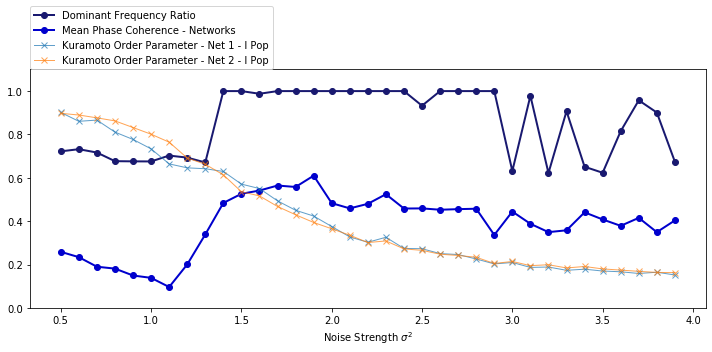

In [30]:
import pprint

plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None, folder="ING")
pprint.pprint(ex.default_params)

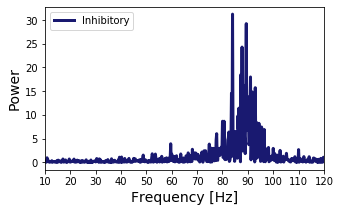

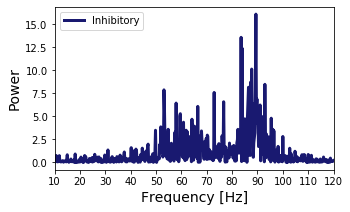

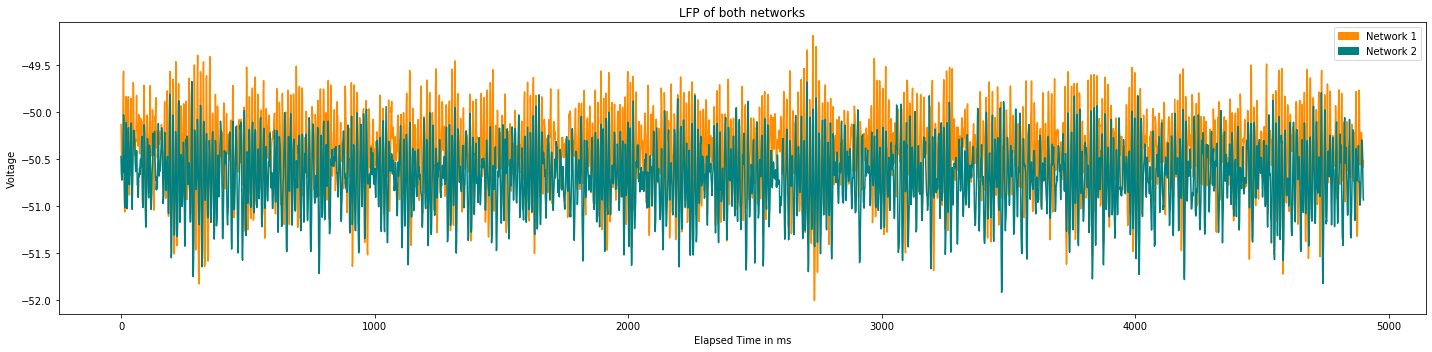

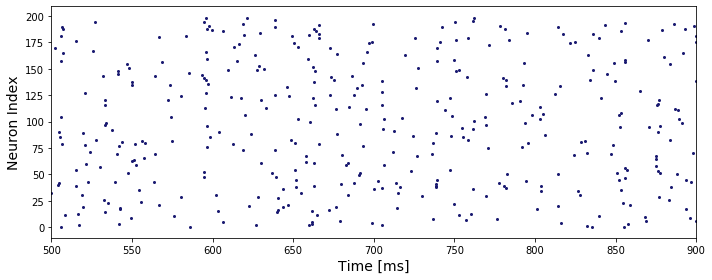

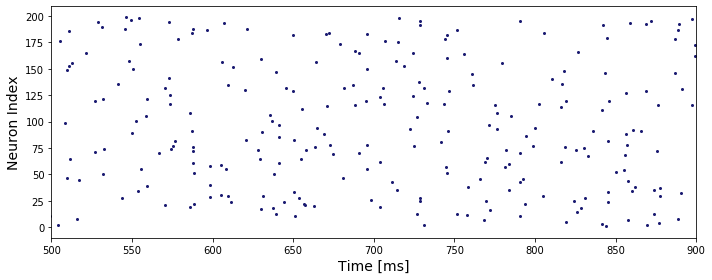

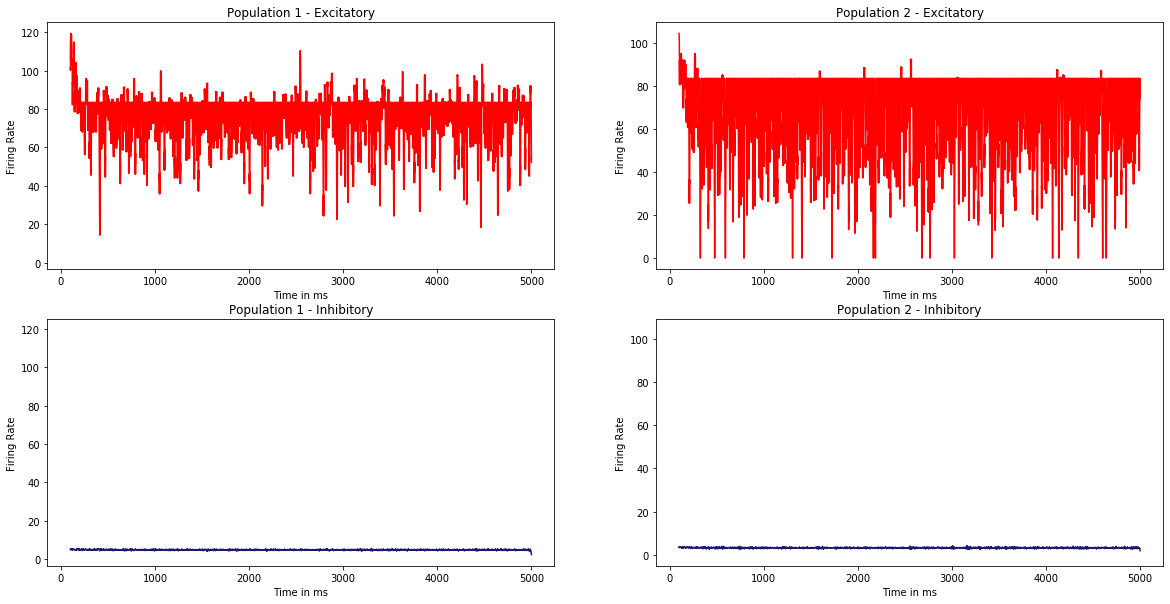

In [35]:
plots.plot_results(ex.get_run(20), psd_group="INH")

In [7]:
ex.params

{0: {'poisson_variance': 0.5},
 1: {'poisson_variance': 1.5},
 10: {'poisson_variance': 10.5},
 11: {'poisson_variance': 11.5},
 12: {'poisson_variance': 12.5},
 13: {'poisson_variance': 13.5},
 14: {'poisson_variance': 14.5},
 2: {'poisson_variance': 2.5},
 3: {'poisson_variance': 3.5},
 4: {'poisson_variance': 4.5},
 5: {'poisson_variance': 5.5},
 6: {'poisson_variance': 6.5},
 7: {'poisson_variance': 7.5},
 8: {'poisson_variance': 8.5},
 9: {'poisson_variance': 9.5}}

Global Order Parameter value of: 0.6701596759795648
Mean Phase Coherence 0.12356346574053309
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.6929046283195431
Within Synchronization of Network 2 0.7694923329836036


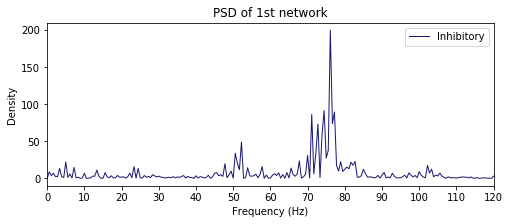

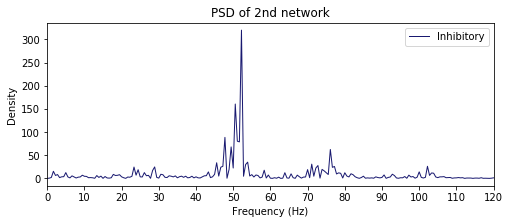

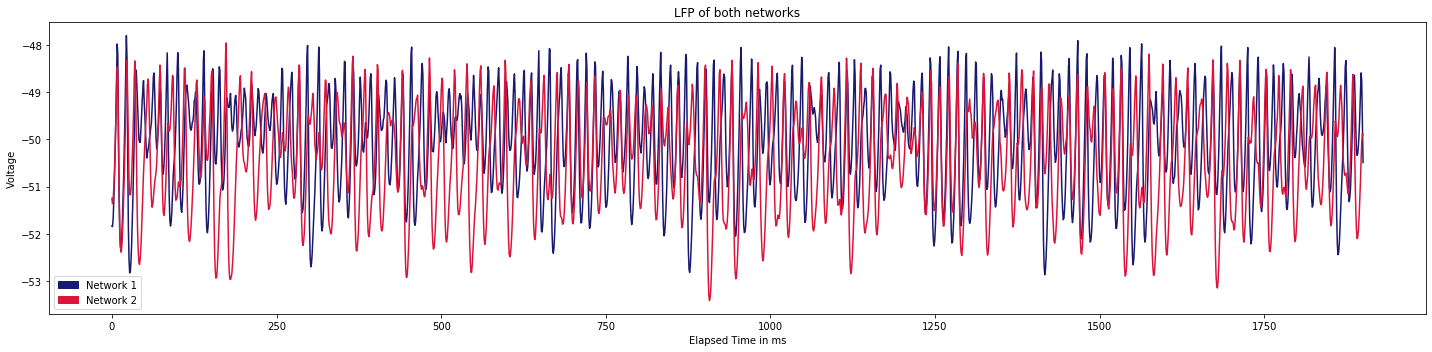

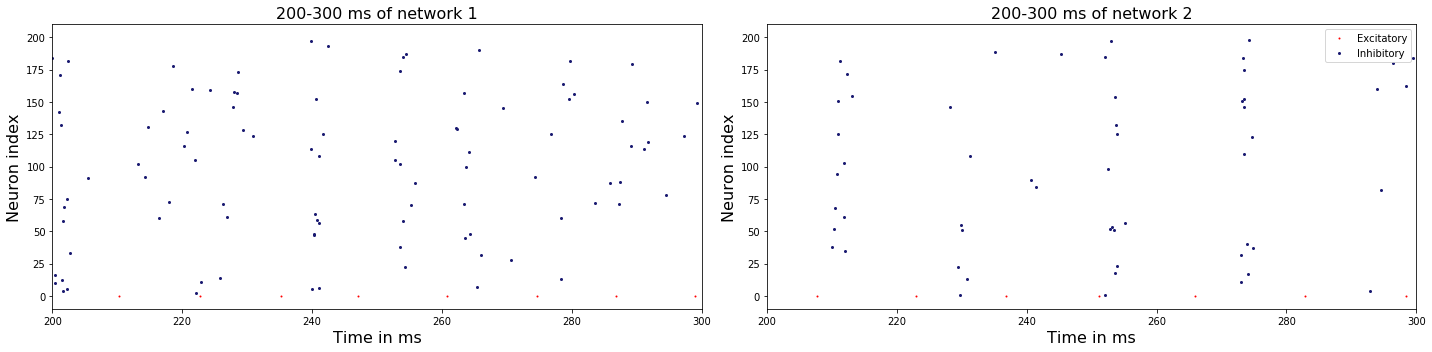

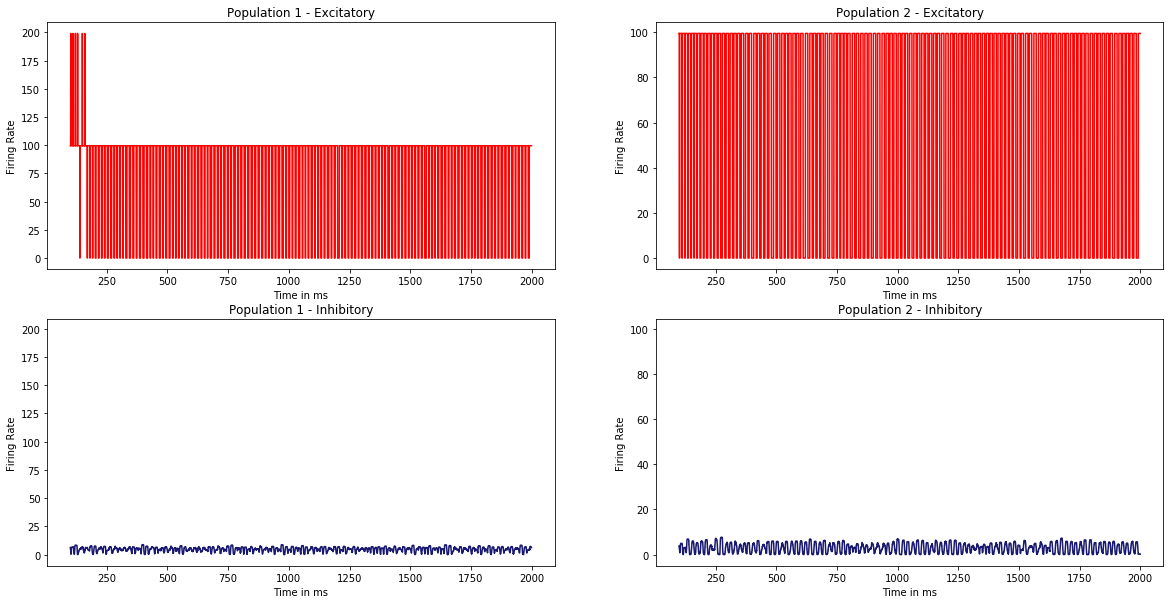

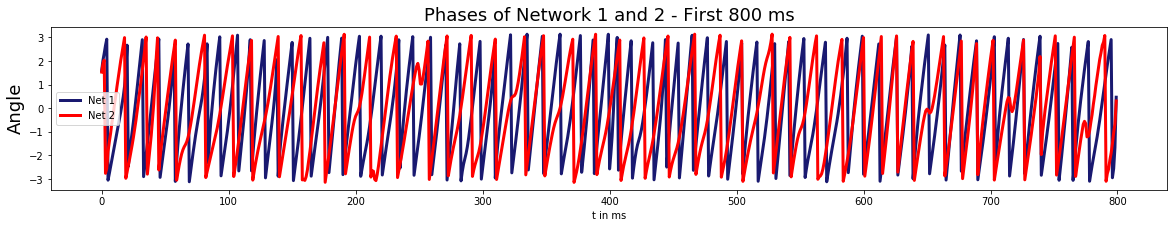

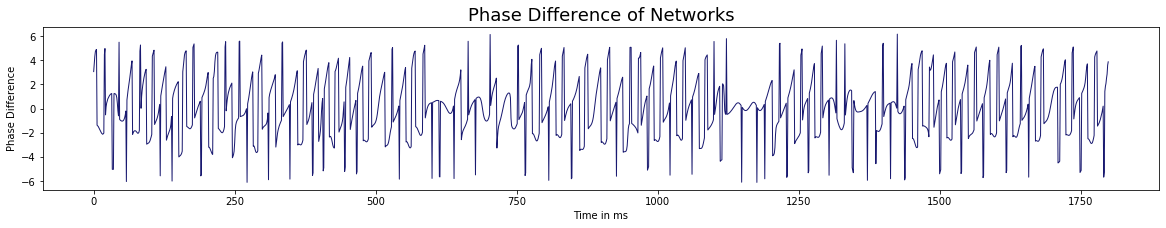

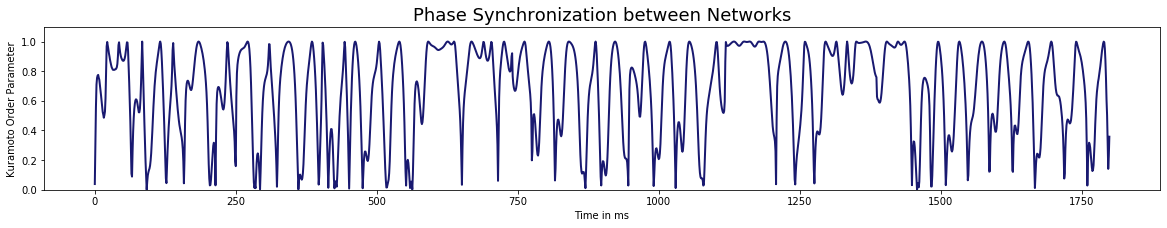

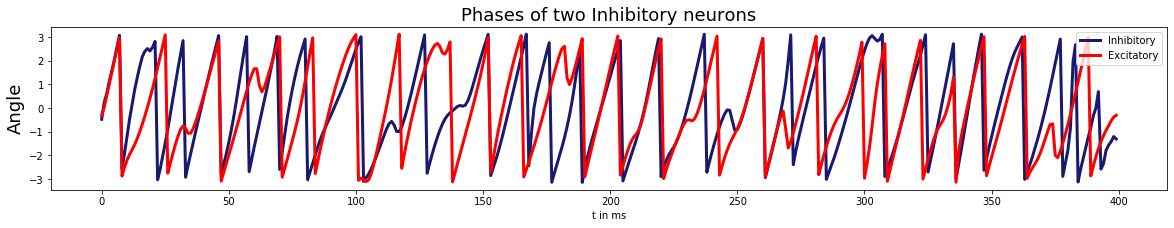

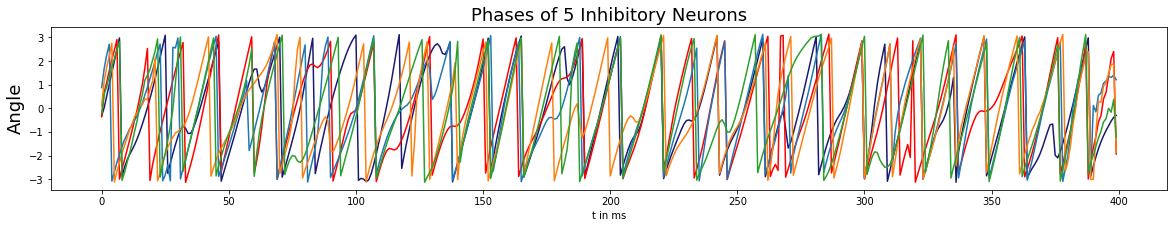

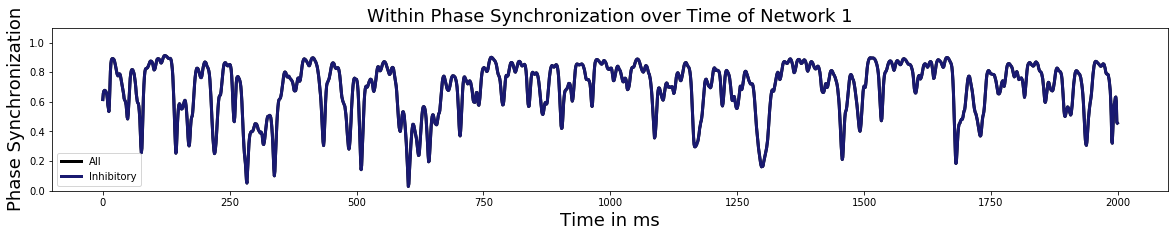

In [112]:
plots.plot_results(ex.get_run(6), psd_group="INH")

## Exploration over Noise Strength and Ratio (2d)

In [36]:
exp_params = {
    "poisson_variance": np.arange(0.5, 2.0, 0.1),
    "poisson_p": np.arange(0.7, 1.0, 0.05),
}

ov_params = dict(params)
ov_params.update({
    "runtime": 3000.0,
    "const_delay": 0.0
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/ING_synch_noise.h5",
    exploration_name="exp_3"
)

In [5]:
ex.run()

2020-09-02 09:59:45,557	INFO resource_spec.py:212 -- Starting Ray with 12.01 GiB memory available for workers and up to 6.03 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-09-02 09:59:45,787	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-09-02 09:59:46,002	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 105 jobs.
100%|██████████| 105/105 [00:00<00:00, 533.16it/s]
INFO:root:Runs took 0.1997690200805664 s to submit.
  0%|          | 0/105 [00:00<?, ?it/s]

(pid=3873) Starting simulation at t=0. s for a duration of 3. s
(pid=3873) 0.631 s (21%) simulated in 10s, estimated 38s remaining.
(pid=3872) Starting simulation at t=0. s for a duration of 3. s
(pid=3882) Starting simulation at t=0. s for a duration of 3. s
(pid=3878) Starting simulation at t=0. s for a duration of 3. s
(pid=3875) Starting simulation at t=0. s for a duration of 3. s
(pid=3876) Starting simulation at t=0. s for a duration of 3. s
(pid=3877) Starting simulation at t=0. s for a duration of 3. s
(pid=3874) Starting simulation at t=0. s for a duration of 3. s
(pid=3879) Starting simulation at t=0. s for a duration of 3. s
(pid=3881) Starting simulation at t=0. s for a duration of 3. s
(pid=3873) 1.1161 s (37%) simulated in 20s, estimated 34s remaining.
(pid=3871) Starting simulation at t=0. s for a duration of 3. s
(pid=3880) Starting simulation at t=0. s for a duration of 3. s
(pid=3872) 0.50445 s (16%) simulated in 10s, estimated 49s remaining.
(pid=3882) 0.50665 s (16%

  1%|          | 1/105 [01:35<2:45:09, 95.29s/it]

(pid=3880) 2.83665 s (94%) simulated in 1m 0s, estimated 3s remaining.
(pid=3871) 3. s (100%) simulated in 1m 3s
(pid=3872) Starting simulation at t=0. s for a duration of 3. s
(pid=3882) Starting simulation at t=0. s for a duration of 3. s


  3%|▎         | 3/105 [01:38<1:20:34, 47.39s/it]

(pid=3880) 3. s (100%) simulated in 1m 3s
(pid=3878) Starting simulation at t=0. s for a duration of 3. s
(pid=3876) Starting simulation at t=0. s for a duration of 3. s
(pid=3875) Starting simulation at t=0. s for a duration of 3. s
(pid=3877) Starting simulation at t=0. s for a duration of 3. s
(pid=3873) 0.4335 s (14%) simulated in 10s, estimated 59s remaining.
(pid=3874) Starting simulation at t=0. s for a duration of 3. s
(pid=3879) Starting simulation at t=0. s for a duration of 3. s
(pid=3881) Starting simulation at t=0. s for a duration of 3. s


 10%|█         | 11/105 [01:47<05:07,  3.27s/it] 

(pid=3871) Starting simulation at t=0. s for a duration of 3. s


 11%|█▏        | 12/105 [01:47<03:44,  2.42s/it]

(pid=3872) 0.39545 s (13%) simulated in 10s, estimated 1m 6s remaining.
(pid=3882) 0.3862 s (12%) simulated in 10s, estimated 1m 8s remaining.
(pid=3880) Starting simulation at t=0. s for a duration of 3. s
(pid=3878) 0.3864 s (12%) simulated in 10s, estimated 1m 8s remaining.
(pid=3876) 0.40285 s (13%) simulated in 10s, estimated 1m 4s remaining.
(pid=3875) 0.40265 s (13%) simulated in 10s, estimated 1m 5s remaining.
(pid=3877) 0.39795 s (13%) simulated in 10s, estimated 1m 5s remaining.
(pid=3873) 0.84105 s (28%) simulated in 20s, estimated 51s remaining.
(pid=3874) 0.40135 s (13%) simulated in 10s, estimated 1m 5s remaining.
(pid=3879) 0.40605 s (13%) simulated in 10s, estimated 1m 4s remaining.
(pid=3881) 0.3916 s (13%) simulated in 10s, estimated 1m 7s remaining.
(pid=3871) 0.41725 s (13%) simulated in 10s, estimated 1m 2s remaining.
(pid=3872) 0.82045 s (27%) simulated in 20s, estimated 53s remaining.
(pid=3882) 0.8008 s (26%) simulated in 20s, estimated 55s remaining.
(pid=3880)

 12%|█▏        | 13/105 [02:47<30:13, 19.71s/it]

(pid=3872) 2.95855 s (98%) simulated in 1m 10s, estimated 1s remaining.
(pid=3882) 2.86935 s (95%) simulated in 1m 10s, estimated 3s remaining.
(pid=3872) 3. s (100%) simulated in 1m 10s
(pid=3880) 2.55005 s (85%) simulated in 1m 0s, estimated 11s remaining.
(pid=3878) 2.8964 s (96%) simulated in 1m 10s, estimated 3s remaining.
(pid=3876) 3. s (100%) simulated in 1m 9s
(pid=3875) 3. s (100%) simulated in 1m 9s
(pid=3882) 3. s (100%) simulated in 1m 12s
(pid=3877) 2.9808 s (99%) simulated in 1m 10s, estimated < 1s remaining.
(pid=3877) 3. s (100%) simulated in 1m 10s
(pid=3879) 3. s (100%) simulated in 1m 9s
(pid=3874) 3. s (100%) simulated in 1m 9s
(pid=3874) WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=3874)   result = operation(self_arr, other_arr)
(pid=3874)  [py.warnings]
(pid=3874) WARNING:py.warnings:/Users/lrebscher/git/Synchro

 13%|█▎        | 14/105 [02:54<24:03, 15.86s/it]

(pid=3881) 3. s (100%) simulated in 1m 11s


 14%|█▍        | 15/105 [02:56<17:30, 11.67s/it]

(pid=3871) 3. s (100%) simulated in 1m 9s
(pid=3872) Starting simulation at t=0. s for a duration of 3. s
(pid=3873) Starting simulation at t=0. s for a duration of 3. s


 16%|█▌        | 17/105 [02:58<08:57,  6.11s/it]

(pid=3876) Starting simulation at t=0. s for a duration of 3. s


 17%|█▋        | 18/105 [02:58<06:23,  4.40s/it]

(pid=3875) Starting simulation at t=0. s for a duration of 3. s
(pid=3880) 3. s (100%) simulated in 1m 9s
(pid=3882) Starting simulation at t=0. s for a duration of 3. s


 20%|██        | 21/105 [03:00<02:27,  1.76s/it]

(pid=3877) Starting simulation at t=0. s for a duration of 3. s
(pid=3874) Starting simulation at t=0. s for a duration of 3. s


 22%|██▏       | 23/105 [03:03<02:26,  1.79s/it]

(pid=3881) Starting simulation at t=0. s for a duration of 3. s


 23%|██▎       | 24/105 [03:05<02:34,  1.90s/it]

(pid=3871) Starting simulation at t=0. s for a duration of 3. s
(pid=3873) 0.438 s (14%) simulated in 10s, estimated 58s remaining.
(pid=3872) 0.4463 s (14%) simulated in 10s, estimated 57s remaining.
(pid=3879) Starting simulation at t=0. s for a duration of 3. s
(pid=3878) Starting simulation at t=0. s for a duration of 3. s
(pid=3876) 0.4448 s (14%) simulated in 10s, estimated 57s remaining.
(pid=3875) 0.4421 s (14%) simulated in 10s, estimated 58s remaining.
(pid=3882) 0.43895 s (14%) simulated in 10s, estimated 58s remaining.
(pid=3877) 0.4358 s (14%) simulated in 10s, estimated 59s remaining.
(pid=3874) 0.4344 s (14%) simulated in 10s, estimated 59s remaining.
(pid=3881) 0.4306 s (14%) simulated in 10s, estimated 1m 0s remaining.
(pid=3871) 0.4443 s (14%) simulated in 10s, estimated 58s remaining.
(pid=3873) 0.8695 s (28%) simulated in 20s, estimated 49s remaining.
(pid=3872) 0.8938 s (29%) simulated in 20s, estimated 47s remaining.
(pid=3879) 0.43005 s (14%) simulated in 10s, es

 26%|██▌       | 27/105 [04:12<13:37, 10.48s/it]

(pid=3872) Starting simulation at t=0. s for a duration of 3. s
(pid=3871) 3. s (100%) simulated in 1m 6s


 27%|██▋       | 28/105 [04:12<09:31,  7.42s/it]

(pid=3881) 3. s (100%) simulated in 1m 8s


 29%|██▊       | 30/105 [04:14<05:20,  4.28s/it]

(pid=3875) Starting simulation at t=0. s for a duration of 3. s
(pid=3879) 3. s (100%) simulated in 1m 8s
(pid=3878) 3. s (100%) simulated in 1m 9s
(pid=3877) Starting simulation at t=0. s for a duration of 3. s
(pid=3880) 2.6057 s (86%) simulated in 1m 0s, estimated 9s remaining.
(pid=3872) 0.4019 s (13%) simulated in 10s, estimated 1m 5s remaining.
(pid=3876) Starting simulation at t=0. s for a duration of 3. s


 30%|██▉       | 31/105 [04:23<06:54,  5.60s/it]

(pid=3881) Starting simulation at t=0. s for a duration of 3. s


 30%|███       | 32/105 [04:23<04:52,  4.01s/it]

(pid=3871) Starting simulation at t=0. s for a duration of 3. s
(pid=3873) Starting simulation at t=0. s for a duration of 3. s


 31%|███▏      | 33/105 [04:24<03:39,  3.04s/it]

(pid=3882) Starting simulation at t=0. s for a duration of 3. s


 33%|███▎      | 35/105 [04:25<01:56,  1.66s/it]

(pid=3875) 0.38665 s (12%) simulated in 10s, estimated 1m 8s remaining.
(pid=3874) Starting simulation at t=0. s for a duration of 3. s
(pid=3877) 0.3774 s (12%) simulated in 10s, estimated 1m 9s remaining.
(pid=3880) 2.9849 s (99%) simulated in 1m 10s, estimated < 1s remaining.
(pid=3880) WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=3880)   result = operation(self_arr, other_arr)
(pid=3880)  [py.warnings]
(pid=3880) WARNING:py.warnings:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=3880)   result = operation(self_arr, other_arr)
(pid=3880) 
(pid=3880) 3. s (100%) simulated in 1m 10s
(pid=3872) 0.7843 s (26%) simulated in 20s, estimated 57s remaining.
(pid=3876) 0.37115 s (12%) simulated in 10s, 

 34%|███▍      | 36/105 [04:37<05:28,  4.77s/it]

(pid=3874) 0.36205 s (12%) simulated in 10s, estimated 1m 13s remaining.
(pid=3877) 0.7363 s (24%) simulated in 20s, estimated 1m 1s remaining.
(pid=3872) 1.1501 s (38%) simulated in 30s, estimated 48s remaining.
(pid=3876) 0.7343 s (24%) simulated in 20s, estimated 1m 2s remaining.
(pid=3881) 0.73515 s (24%) simulated in 20s, estimated 1m 2s remaining.
(pid=3871) 0.73885 s (24%) simulated in 20s, estimated 1m 1s remaining.
(pid=3873) 0.73875 s (24%) simulated in 20s, estimated 1m 1s remaining.
(pid=3882) 0.72735 s (24%) simulated in 20s, estimated 1m 2s remaining.
(pid=3879) 0.3761 s (12%) simulated in 10s, estimated 1m 10s remaining.
(pid=3875) 1.12675 s (37%) simulated in 30s, estimated 50s remaining.
(pid=3878) 0.3789 s (12%) simulated in 10s, estimated 1m 9s remaining.
(pid=3874) 0.74545 s (24%) simulated in 20s, estimated 1m 0s remaining.
(pid=3880) Starting simulation at t=0. s for a duration of 3. s
(pid=3877) 1.1147 s (37%) simulated in 30s, estimated 51s remaining.
(pid=3872)

 35%|███▌      | 37/105 [05:31<22:15, 19.64s/it]

(pid=3877) 3. s (100%) simulated in 1m 14s
(pid=3876) 2.8777 s (95%) simulated in 1m 10s, estimated 3s remaining.
(pid=3881) 2.8782 s (95%) simulated in 1m 10s, estimated 3s remaining.
(pid=3871) 2.8951 s (96%) simulated in 1m 10s, estimated 3s remaining.
(pid=3873) 2.8903 s (96%) simulated in 1m 10s, estimated 3s remaining.
(pid=3882) 2.84635 s (94%) simulated in 1m 10s, estimated 4s remaining.
(pid=3879) 2.52285 s (84%) simulated in 1m 0s, estimated 11s remaining.
(pid=3872) Starting simulation at t=0. s for a duration of 3. s
(pid=3878) 2.52165 s (84%) simulated in 1m 0s, estimated 11s remaining.
(pid=3876) 3. s (100%) simulated in 1m 12s
(pid=3871) 3. s (100%) simulated in 1m 12s
(pid=3881) 3. s (100%) simulated in 1m 12s
(pid=3871) WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=3871)   result = operation(self_arr, other_arr)
(pid=3

 38%|███▊      | 40/105 [05:44<09:24,  8.69s/it]

(pid=3879) 2.93835 s (97%) simulated in 1m 10s, estimated 1s remaining.


 40%|████      | 42/105 [05:45<04:48,  4.58s/it]

(pid=3872) 0.4202 s (14%) simulated in 10s, estimated 1m 1s remaining.
(pid=3878) 2.93715 s (97%) simulated in 1m 10s, estimated 1s remaining.
(pid=3879) 3. s (100%) simulated in 1m 11s
(pid=3876) Starting simulation at t=0. s for a duration of 3. s
(pid=3871) Starting simulation at t=0. s for a duration of 3. s


 41%|████      | 43/105 [05:47<03:46,  3.65s/it]

(pid=3873) Starting simulation at t=0. s for a duration of 3. s


 42%|████▏     | 44/105 [05:47<02:41,  2.65s/it]

(pid=3878) 3. s (100%) simulated in 1m 11s


 43%|████▎     | 45/105 [05:47<01:58,  1.97s/it]

(pid=3880) 2.55665 s (85%) simulated in 1m 0s, estimated 10s remaining.
(pid=3875) 0.41595 s (13%) simulated in 10s, estimated 1m 2s remaining.
(pid=3877) Starting simulation at t=0. s for a duration of 3. s
(pid=3874) Starting simulation at t=0. s for a duration of 3. s
(pid=3881) Starting simulation at t=0. s for a duration of 3. s


 45%|████▍     | 47/105 [05:54<02:21,  2.45s/it]

(pid=3872) 0.82775 s (27%) simulated in 20s, estimated 52s remaining.
(pid=3882) Starting simulation at t=0. s for a duration of 3. s
(pid=3876) 0.4124 s (13%) simulated in 10s, estimated 1m 3s remaining.
(pid=3871) 0.4153 s (13%) simulated in 10s, estimated 1m 2s remaining.
(pid=3873) 0.41215 s (13%) simulated in 10s, estimated 1m 3s remaining.
(pid=3880) 2.97055 s (99%) simulated in 1m 10s, estimated 1s remaining.
(pid=3880) 3. s (100%) simulated in 1m 10s
(pid=3875) 0.83315 s (27%) simulated in 20s, estimated 52s remaining.
(pid=3877) 0.4182 s (13%) simulated in 10s, estimated 1m 2s remaining.
(pid=3874) 0.42625 s (14%) simulated in 10s, estimated 1m 0s remaining.
(pid=3881) 0.4136 s (13%) simulated in 10s, estimated 1m 3s remaining.
(pid=3879) Starting simulation at t=0. s for a duration of 3. s
(pid=3878) Starting simulation at t=0. s for a duration of 3. s
(pid=3872) 1.2495 s (41%) simulated in 30s, estimated 42s remaining.
(pid=3882) 0.4213 s (14%) simulated in 10s, estimated 1m

 46%|████▌     | 48/105 [06:05<04:54,  5.17s/it]

(pid=3876) 0.83185 s (27%) simulated in 20s, estimated 52s remaining.
(pid=3871) 0.83875 s (27%) simulated in 20s, estimated 52s remaining.
(pid=3873) 0.83065 s (27%) simulated in 20s, estimated 52s remaining.
(pid=3875) 1.2298 s (40%) simulated in 30s, estimated 43s remaining.
(pid=3877) 0.8132 s (27%) simulated in 20s, estimated 54s remaining.
(pid=3874) 0.81515 s (27%) simulated in 20s, estimated 54s remaining.
(pid=3881) 0.7924 s (26%) simulated in 20s, estimated 56s remaining.
(pid=3879) 0.3881 s (12%) simulated in 10s, estimated 1m 7s remaining.
(pid=3878) 0.38305 s (12%) simulated in 10s, estimated 1m 8s remaining.
(pid=3872) 1.6213 s (54%) simulated in 40s, estimated 34s remaining.
(pid=3882) 0.78285 s (26%) simulated in 20s, estimated 57s remaining.
(pid=3876) 1.20805 s (40%) simulated in 30s, estimated 45s remaining.
(pid=3871) 1.21565 s (40%) simulated in 30s, estimated 44s remaining.
(pid=3873) 1.19935 s (39%) simulated in 30s, estimated 45s remaining.
(pid=3875) 1.58715 s 

 47%|████▋     | 49/105 [07:16<23:12, 24.86s/it]

(pid=3873) 2.80765 s (93%) simulated in 1m 30s, estimated 6s remaining.
(pid=3880) 1.32425 s (44%) simulated in 50s, estimated 1m 3s remaining.
(pid=3877) 2.72825 s (90%) simulated in 1m 30s, estimated 9s remaining.
(pid=3874) 2.7513 s (91%) simulated in 1m 30s, estimated 8s remaining.
(pid=3881) 2.6558 s (88%) simulated in 1m 30s, estimated 12s remaining.
(pid=3879) 2.2856 s (76%) simulated in 1m 20s, estimated 25s remaining.
(pid=3872) Starting simulation at t=0. s for a duration of 3. s
(pid=3876) 3. s (100%) simulated in 1m 37s


 48%|████▊     | 50/105 [07:24<18:01, 19.66s/it]

(pid=3878) 2.25085 s (75%) simulated in 1m 20s, estimated 27s remaining.
(pid=3871) 3. s (100%) simulated in 1m 37s
(pid=3882) 2.5995 s (86%) simulated in 1m 30s, estimated 14s remaining.
(pid=3873) 3. s (100%) simulated in 1m 38s
(pid=3880) 1.53965 s (51%) simulated in 1m 0s, estimated 57s remaining.
(pid=3875) Starting simulation at t=0. s for a duration of 3. s
(pid=3877) 2.93645 s (97%) simulated in 1m 40s, estimated 2s remaining.
(pid=3874) 2.95735 s (98%) simulated in 1m 40s, estimated 1s remaining.
(pid=3874) 3. s (100%) simulated in 1m 41s
(pid=3881) 2.8621 s (95%) simulated in 1m 40s, estimated 5s remaining.
(pid=3877) 3. s (100%) simulated in 1m 42s
(pid=3879) 2.499 s (83%) simulated in 1m 30s, estimated 18s remaining.
(pid=3872) 212.2 ms (7%) simulated in 10s, estimated 2m 11s remaining.
(pid=3878) 2.46455 s (82%) simulated in 1m 30s, estimated 20s remaining.
(pid=3882) 2.8156 s (93%) simulated in 1m 40s, estimated 7s remaining.
(pid=3880) 1.75245 s (58%) simulated in 1m 10s

 50%|█████     | 53/105 [07:46<08:48, 10.17s/it]

(pid=3880) 1.95805 s (65%) simulated in 1m 20s, estimated 43s remaining.
(pid=3875) 0.43595 s (14%) simulated in 20s, estimated 1m 58s remaining.
(pid=3877) Starting simulation at t=0. s for a duration of 3. s


 52%|█████▏    | 55/105 [07:52<05:14,  6.29s/it]

(pid=3879) 2.92965 s (97%) simulated in 1m 50s, estimated 3s remaining.
(pid=3872) 0.64385 s (21%) simulated in 30s, estimated 1m 50s remaining.
(pid=3878) 2.8845 s (96%) simulated in 1m 50s, estimated 4s remaining.
(pid=3873) 223.75 ms (7%) simulated in 10s, estimated 2m 4s remaining.
(pid=3871) Starting simulation at t=0. s for a duration of 3. s
(pid=3879) 3. s (100%) simulated in 1m 53s


 54%|█████▍    | 57/105 [07:57<03:20,  4.18s/it]

(pid=3880) 2.16765 s (72%) simulated in 1m 30s, estimated 35s remaining.
(pid=3878) 3. s (100%) simulated in 1m 55s
(pid=3878) WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=3878)   result = operation(self_arr, other_arr)
(pid=3878)  [py.warnings]
(pid=3878) WARNING:py.warnings:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:1397: RuntimeWarning: overflow encountered in true_divide
(pid=3878)   result = operation(self_arr, other_arr)
(pid=3878) 
(pid=3875) 0.64305 s (21%) simulated in 30s, estimated 1m 50s remaining.
(pid=3877) 207.95 ms (6%) simulated in 10s, estimated 2m 14s remaining.
(pid=3872) 0.8561 s (28%) simulated in 40s, estimated 1m 40s remaining.
(pid=3882) Starting simulation at t=0. s for a duration of 3. s
(pid=3874) Starting simulation at t=0. s

 55%|█████▌    | 58/105 [08:08<04:46,  6.09s/it]

(pid=3881) Starting simulation at t=0. s for a duration of 3. s
(pid=3875) 0.88145 s (29%) simulated in 40s, estimated 1m 36s remaining.


 56%|█████▌    | 59/105 [08:11<03:52,  5.06s/it]

(pid=3877) 0.44915 s (14%) simulated in 20s, estimated 1m 54s remaining.
(pid=3872) 1.09125 s (36%) simulated in 50s, estimated 1m 27s remaining.
(pid=3882) 236.9 ms (7%) simulated in 10s, estimated 1m 57s remaining.
(pid=3874) 235.05 ms (7%) simulated in 10s, estimated 1m 58s remaining.
(pid=3873) 0.684 s (22%) simulated in 30s, estimated 1m 42s remaining.
(pid=3871) 0.4575 s (15%) simulated in 20s, estimated 1m 51s remaining.
(pid=3876) 226.45 ms (7%) simulated in 10s, estimated 2m 2s remaining.
(pid=3880) 2.6225 s (87%) simulated in 1m 50s, estimated 16s remaining.
(pid=3881) 224. ms (7%) simulated in 10s, estimated 2m 4s remaining.
(pid=3875) 1.1057 s (36%) simulated in 50s, estimated 1m 26s remaining.
(pid=3877) 0.6763 s (22%) simulated in 30s, estimated 1m 43s remaining.
(pid=3872) 1.33325 s (44%) simulated in 1m 0s, estimated 1m 15s remaining.
(pid=3882) 0.4818 s (16%) simulated in 20s, estimated 1m 45s remaining.
(pid=3874) 0.47545 s (15%) simulated in 20s, estimated 1m 46s rem

 57%|█████▋    | 60/105 [08:47<10:45, 14.34s/it]

(pid=3878) 232.05 ms (7%) simulated in 10s, estimated 1m 59s remaining.
(pid=3881) 0.90735 s (30%) simulated in 40s, estimated 1m 32s remaining.
(pid=3875) 1.8089 s (60%) simulated in 1m 20s, estimated 53s remaining.
(pid=3877) 1.3733 s (45%) simulated in 1m 0s, estimated 1m 11s remaining.
(pid=3872) 2.06365 s (68%) simulated in 1m 30s, estimated 41s remaining.
(pid=3882) 1.2091 s (40%) simulated in 50s, estimated 1m 14s remaining.
(pid=3874) 1.2048 s (40%) simulated in 50s, estimated 1m 15s remaining.
(pid=3873) 1.68265 s (56%) simulated in 1m 10s, estimated 55s remaining.
(pid=3879) 0.7419 s (24%) simulated in 30s, estimated 1m 31s remaining.
(pid=3871) 1.45385 s (48%) simulated in 1m 0s, estimated 1m 4s remaining.
(pid=3876) 1.2089 s (40%) simulated in 50s, estimated 1m 14s remaining.
(pid=3880) Starting simulation at t=0. s for a duration of 3. s
(pid=3878) 0.5837 s (19%) simulated in 20s, estimated 1m 23s remaining.
(pid=3881) 1.25475 s (41%) simulated in 50s, estimated 1m 10s rem

 58%|█████▊    | 61/105 [09:27<16:11, 22.08s/it]

(pid=3880) 1.05415 s (35%) simulated in 30s, estimated 55s remaining.
(pid=3878) 1.6121 s (53%) simulated in 50s, estimated 43s remaining.
(pid=3881) 2.2646 s (75%) simulated in 1m 20s, estimated 26s remaining.
(pid=3877) 2.7436 s (91%) simulated in 1m 40s, estimated 9s remaining.
(pid=3873) 3. s (100%) simulated in 1m 47s
(pid=3872) Starting simulation at t=0. s for a duration of 3. s


 59%|█████▉    | 62/105 [09:32<12:14, 17.08s/it]

(pid=3882) 2.59025 s (86%) simulated in 1m 30s, estimated 14s remaining.
(pid=3874) 2.5787 s (85%) simulated in 1m 30s, estimated 15s remaining.
(pid=3879) 2.08155 s (69%) simulated in 1m 10s, estimated 31s remaining.
(pid=3871) 2.81225 s (93%) simulated in 1m 40s, estimated 7s remaining.
(pid=3876) 2.5155 s (83%) simulated in 1m 30s, estimated 17s remaining.
(pid=3875) Starting simulation at t=0. s for a duration of 3. s
(pid=3880) 1.33435 s (44%) simulated in 40s, estimated 50s remaining.
(pid=3878) 1.89255 s (63%) simulated in 1m 0s, estimated 35s remaining.
(pid=3881) 2.54505 s (84%) simulated in 1m 30s, estimated 16s remaining.
(pid=3877) 3. s (100%) simulated in 1m 49s
(pid=3871) 3. s (100%) simulated in 1m 46s
(pid=3872) 287.7 ms (9%) simulated in 10s, estimated 1m 34s remaining.
(pid=3882) 2.87755 s (95%) simulated in 1m 40s, estimated 4s remaining.
(pid=3874) 2.8649 s (95%) simulated in 1m 40s, estimated 5s remaining.
(pid=3879) 2.36305 s (78%) simulated in 1m 20s, estimated 2

 63%|██████▎   | 66/105 [10:07<05:04,  7.81s/it]

(pid=3875) 0.794 s (26%) simulated in 30s, estimated 1m 23s remaining.
(pid=3877) Starting simulation at t=0. s for a duration of 3. s


 64%|██████▍   | 67/105 [10:07<03:32,  5.60s/it]

(pid=3873) Starting simulation at t=0. s for a duration of 3. s


 65%|██████▍   | 68/105 [10:08<02:39,  4.30s/it]

(pid=3880) 2.11385 s (70%) simulated in 1m 10s, estimated 29s remaining.
(pid=3871) Starting simulation at t=0. s for a duration of 3. s


 66%|██████▌   | 69/105 [10:09<01:52,  3.14s/it]

(pid=3878) 2.65265 s (88%) simulated in 1m 30s, estimated 12s remaining.
(pid=3879) 3. s (100%) simulated in 1m 45s
(pid=3876) Starting simulation at t=0. s for a duration of 3. s
(pid=3872) 1.074 s (35%) simulated in 40s, estimated 1m 12s remaining.
(pid=3875) 1.0591 s (35%) simulated in 40s, estimated 1m 13s remaining.
(pid=3877) 260.3 ms (8%) simulated in 10s, estimated 1m 45s remaining.
(pid=3873) 257.4 ms (8%) simulated in 10s, estimated 1m 47s remaining.
(pid=3880) 2.37195 s (79%) simulated in 1m 20s, estimated 21s remaining.
(pid=3871) 252.1 ms (8%) simulated in 10s, estimated 1m 49s remaining.
(pid=3878) 2.9087 s (96%) simulated in 1m 40s, estimated 3s remaining.


 67%|██████▋   | 70/105 [10:20<03:18,  5.67s/it]

(pid=3876) 262.85 ms (8%) simulated in 10s, estimated 1m 44s remaining.
(pid=3872) 1.333 s (44%) simulated in 50s, estimated 1m 3s remaining.
(pid=3878) 3. s (100%) simulated in 1m 43s
(pid=3881) Starting simulation at t=0. s for a duration of 3. s
(pid=3874) Starting simulation at t=0. s for a duration of 3. s
(pid=3882) Starting simulation at t=0. s for a duration of 3. s
(pid=3875) 1.3445 s (44%) simulated in 50s, estimated 1m 2s remaining.
(pid=3877) 0.5423 s (18%) simulated in 20s, estimated 1m 31s remaining.
(pid=3873) 0.5331 s (17%) simulated in 20s, estimated 1m 33s remaining.
(pid=3880) 2.6489 s (88%) simulated in 1m 30s, estimated 12s remaining.
(pid=3871) 0.5234 s (17%) simulated in 20s, estimated 1m 35s remaining.
(pid=3876) 0.5392 s (17%) simulated in 20s, estimated 1m 31s remaining.
(pid=3872) 1.61085 s (53%) simulated in 1m 0s, estimated 52s remaining.


 68%|██████▊   | 71/105 [10:33<04:19,  7.63s/it]

(pid=3881) 264.1 ms (8%) simulated in 10s, estimated 1m 44s remaining.
(pid=3874) 273.1 ms (9%) simulated in 10s, estimated 1m 40s remaining.
(pid=3879) Starting simulation at t=0. s for a duration of 3. s
(pid=3882) 271.1 ms (9%) simulated in 10s, estimated 1m 41s remaining.
(pid=3875) 1.62395 s (54%) simulated in 1m 0s, estimated 51s remaining.
(pid=3877) 0.8206 s (27%) simulated in 30s, estimated 1m 20s remaining.
(pid=3873) 0.82275 s (27%) simulated in 30s, estimated 1m 19s remaining.
(pid=3880) 2.9584 s (98%) simulated in 1m 40s, estimated 1s remaining.
(pid=3871) 0.82395 s (27%) simulated in 30s, estimated 1m 19s remaining.
(pid=3880) 3. s (100%) simulated in 1m 41s
(pid=3876) 0.8712 s (29%) simulated in 30s, estimated 1m 13s remaining.
(pid=3872) 1.9535 s (65%) simulated in 1m 10s, estimated 38s remaining.
(pid=3881) 0.6255 s (20%) simulated in 20s, estimated 1m 16s remaining.
(pid=3874) 0.64085 s (21%) simulated in 20s, estimated 1m 14s remaining.
(pid=3878) Starting simulation

 69%|██████▊   | 72/105 [10:47<05:16,  9.61s/it]

(pid=3875) 2.0109 s (67%) simulated in 1m 10s, estimated 34s remaining.
(pid=3877) 1.19835 s (39%) simulated in 40s, estimated 1m 0s remaining.
(pid=3873) 1.20505 s (40%) simulated in 40s, estimated 1m 0s remaining.
(pid=3871) 1.19165 s (39%) simulated in 40s, estimated 1m 1s remaining.
(pid=3876) 1.23955 s (41%) simulated in 40s, estimated 57s remaining.
(pid=3872) 2.32045 s (77%) simulated in 1m 20s, estimated 23s remaining.
(pid=3881) 0.97175 s (32%) simulated in 30s, estimated 1m 3s remaining.
(pid=3874) 0.9854 s (32%) simulated in 30s, estimated 1m 1s remaining.
(pid=3878) 0.3437 s (11%) simulated in 10s, estimated 1m 17s remaining.
(pid=3879) 0.7158 s (23%) simulated in 20s, estimated 1m 4s remaining.
(pid=3882) 0.98825 s (32%) simulated in 30s, estimated 1m 1s remaining.
(pid=3875) 2.35225 s (78%) simulated in 1m 20s, estimated 22s remaining.
(pid=3877) 1.5359 s (51%) simulated in 50s, estimated 48s remaining.
(pid=3873) 1.5484 s (51%) simulated in 50s, estimated 47s remaining.


 70%|██████▉   | 73/105 [11:17<08:22, 15.71s/it]

(pid=3877) 2.2911 s (76%) simulated in 1m 10s, estimated 22s remaining.
(pid=3873) 2.3152 s (77%) simulated in 1m 10s, estimated 21s remaining.
(pid=3871) 2.288 s (76%) simulated in 1m 10s, estimated 22s remaining.
(pid=3880) 0.763 s (25%) simulated in 20s, estimated 59s remaining.
(pid=3876) 2.34765 s (78%) simulated in 1m 10s, estimated 19s remaining.


 70%|███████   | 74/105 [11:22<06:26, 12.46s/it]

(pid=3872) Starting simulation at t=0. s for a duration of 3. s
(pid=3881) 2.04805 s (68%) simulated in 1m 0s, estimated 28s remaining.
(pid=3874) 2.0696 s (68%) simulated in 1m 0s, estimated 27s remaining.
(pid=3878) 1.42235 s (47%) simulated in 40s, estimated 44s remaining.
(pid=3879) 1.78735 s (59%) simulated in 50s, estimated 34s remaining.
(pid=3882) 2.05525 s (68%) simulated in 1m 0s, estimated 28s remaining.
(pid=3875) Starting simulation at t=0. s for a duration of 3. s
(pid=3877) 2.59465 s (86%) simulated in 1m 20s, estimated 13s remaining.
(pid=3873) 2.61825 s (87%) simulated in 1m 20s, estimated 12s remaining.
(pid=3871) 2.59145 s (86%) simulated in 1m 20s, estimated 13s remaining.
(pid=3880) 1.0701 s (35%) simulated in 30s, estimated 54s remaining.
(pid=3876) 2.65745 s (88%) simulated in 1m 20s, estimated 10s remaining.
(pid=3872) 0.32565 s (10%) simulated in 10s, estimated 1m 22s remaining.
(pid=3881) 2.3553 s (78%) simulated in 1m 10s, estimated 19s remaining.
(pid=3874) 

 73%|███████▎  | 77/105 [11:49<04:00,  8.59s/it]

(pid=3880) 1.74645 s (58%) simulated in 50s, estimated 36s remaining.
(pid=3872) 1.0217 s (34%) simulated in 30s, estimated 58s remaining.
(pid=3874) 3. s (100%) simulated in 1m 27s
(pid=3881) 3. s (100%) simulated in 1m 28s
(pid=3871) Starting simulation at t=0. s for a duration of 3. s
(pid=3882) 3. s (100%) simulated in 1m 28s
(pid=3878) 2.42855 s (80%) simulated in 1m 10s, estimated 16s remaining.
(pid=3879) 2.7994 s (93%) simulated in 1m 20s, estimated 6s remaining.
(pid=3875) 1.03515 s (34%) simulated in 30s, estimated 57s remaining.
(pid=3880) 2.08015 s (69%) simulated in 1m 0s, estimated 27s remaining.
(pid=3873) Starting simulation at t=0. s for a duration of 3. s
(pid=3877) Starting simulation at t=0. s for a duration of 3. s
(pid=3876) Starting simulation at t=0. s for a duration of 3. s
(pid=3879) 3. s (100%) simulated in 1m 25s


 75%|███████▌  | 79/105 [12:02<03:00,  6.95s/it]

(pid=3872) 1.36175 s (45%) simulated in 40s, estimated 48s remaining.


 77%|███████▋  | 81/105 [12:02<01:25,  3.55s/it]

(pid=3871) 0.34705 s (11%) simulated in 10s, estimated 1m 16s remaining.
(pid=3878) 2.78035 s (92%) simulated in 1m 20s, estimated 6s remaining.
(pid=3875) 1.3888 s (46%) simulated in 40s, estimated 46s remaining.


 78%|███████▊  | 82/105 [12:09<01:41,  4.41s/it]

(pid=3880) 2.43415 s (81%) simulated in 1m 10s, estimated 16s remaining.
(pid=3873) 0.3599 s (11%) simulated in 10s, estimated 1m 13s remaining.
(pid=3877) 0.35125 s (11%) simulated in 10s, estimated 1m 15s remaining.
(pid=3876) 0.35275 s (11%) simulated in 10s, estimated 1m 15s remaining.
(pid=3878) 3. s (100%) simulated in 1m 26s
(pid=3872) 1.7154 s (57%) simulated in 50s, estimated 37s remaining.
(pid=3874) Starting simulation at t=0. s for a duration of 3. s
(pid=3871) 0.6991 s (23%) simulated in 20s, estimated 1m 6s remaining.
(pid=3875) 1.7303 s (57%) simulated in 50s, estimated 37s remaining.
(pid=3882) Starting simulation at t=0. s for a duration of 3. s
(pid=3881) Starting simulation at t=0. s for a duration of 3. s
(pid=3880) 2.7666 s (92%) simulated in 1m 20s, estimated 7s remaining.
(pid=3873) 0.69915 s (23%) simulated in 20s, estimated 1m 6s remaining.


 79%|███████▉  | 83/105 [12:20<02:18,  6.32s/it]

(pid=3877) 0.6813 s (22%) simulated in 20s, estimated 1m 8s remaining.
(pid=3876) 0.6966 s (23%) simulated in 20s, estimated 1m 6s remaining.
(pid=3879) Starting simulation at t=0. s for a duration of 3. s
(pid=3872) 2.0428 s (68%) simulated in 1m 0s, estimated 28s remaining.
(pid=3874) 0.32215 s (10%) simulated in 10s, estimated 1m 23s remaining.
(pid=3871) 1.01775 s (33%) simulated in 30s, estimated 58s remaining.
(pid=3875) 2.03985 s (67%) simulated in 1m 0s, estimated 28s remaining.
(pid=3882) 300.25 ms (10%) simulated in 10s, estimated 1m 30s remaining.
(pid=3880) 3. s (100%) simulated in 1m 28s
(pid=3881) 299. ms (9%) simulated in 10s, estimated 1m 30s remaining.
(pid=3873) 1.0031 s (33%) simulated in 30s, estimated 1m 0s remaining.
(pid=3877) 0.9844 s (32%) simulated in 30s, estimated 1m 1s remaining.
(pid=3876) 1.0038 s (33%) simulated in 30s, estimated 1m 0s remaining.
(pid=3879) 314.15 ms (10%) simulated in 10s, estimated 1m 25s remaining.
(pid=3872) 2.36195 s (78%) simulated

 80%|████████  | 84/105 [12:36<03:18,  9.45s/it]

(pid=3882) 0.60865 s (20%) simulated in 20s, estimated 1m 19s remaining.
(pid=3881) 0.60845 s (20%) simulated in 20s, estimated 1m 19s remaining.
(pid=3873) 1.31365 s (43%) simulated in 40s, estimated 51s remaining.
(pid=3877) 1.28755 s (42%) simulated in 40s, estimated 53s remaining.
(pid=3876) 1.30895 s (43%) simulated in 40s, estimated 52s remaining.
(pid=3880) Starting simulation at t=0. s for a duration of 3. s
(pid=3879) 0.62175 s (20%) simulated in 20s, estimated 1m 17s remaining.
(pid=3872) 2.66745 s (88%) simulated in 1m 20s, estimated 10s remaining.
(pid=3874) 0.93075 s (31%) simulated in 30s, estimated 1m 7s remaining.
(pid=3871) 1.6344 s (54%) simulated in 50s, estimated 42s remaining.
(pid=3878) 307.2 ms (10%) simulated in 10s, estimated 1m 28s remaining.
(pid=3875) 2.67 s (89%) simulated in 1m 20s, estimated 10s remaining.
(pid=3882) 0.9297 s (30%) simulated in 30s, estimated 1m 7s remaining.
(pid=3881) 0.93185 s (31%) simulated in 30s, estimated 1m 7s remaining.
(pid=387

 81%|████████  | 85/105 [12:58<04:25, 13.26s/it]

(pid=3873) 2.03165 s (67%) simulated in 1m 0s, estimated 29s remaining.
(pid=3877) 1.98295 s (66%) simulated in 1m 0s, estimated 31s remaining.
(pid=3876) 2.02845 s (67%) simulated in 1m 0s, estimated 29s remaining.
(pid=3880) 0.717 s (23%) simulated in 20s, estimated 1m 4s remaining.
(pid=3879) 1.3353 s (44%) simulated in 40s, estimated 50s remaining.
(pid=3874) 1.64315 s (54%) simulated in 50s, estimated 41s remaining.


 82%|████████▏ | 86/105 [13:02<03:17, 10.41s/it]

(pid=3871) 2.3472 s (78%) simulated in 1m 10s, estimated 19s remaining.
(pid=3878) 1.0146 s (33%) simulated in 30s, estimated 59s remaining.
(pid=3882) 1.66605 s (55%) simulated in 50s, estimated 40s remaining.
(pid=3881) 1.66615 s (55%) simulated in 50s, estimated 40s remaining.
(pid=3873) 2.3955 s (79%) simulated in 1m 10s, estimated 18s remaining.
(pid=3877) 2.34215 s (78%) simulated in 1m 10s, estimated 20s remaining.
(pid=3876) 2.3917 s (79%) simulated in 1m 10s, estimated 18s remaining.
(pid=3880) 1.0885 s (36%) simulated in 30s, estimated 53s remaining.
(pid=3879) 1.70115 s (56%) simulated in 50s, estimated 38s remaining.
(pid=3874) 2.00665 s (66%) simulated in 1m 0s, estimated 30s remaining.
(pid=3871) 2.71115 s (90%) simulated in 1m 20s, estimated 9s remaining.
(pid=3878) 1.3697 s (45%) simulated in 40s, estimated 48s remaining.
(pid=3882) 2.03045 s (67%) simulated in 1m 0s, estimated 29s remaining.
(pid=3881) 2.0316 s (67%) simulated in 1m 0s, estimated 29s remaining.
(pid=38

 83%|████████▎ | 87/105 [13:35<05:08, 17.13s/it]

(pid=3882) 2.70305 s (90%) simulated in 1m 20s, estimated 9s remaining.
(pid=3881) 2.70145 s (90%) simulated in 1m 20s, estimated 9s remaining.


 85%|████████▍ | 89/105 [13:38<02:24,  9.06s/it]

(pid=3872) 0.66465 s (22%) simulated in 20s, estimated 1m 10s remaining.


 86%|████████▌ | 90/105 [13:38<01:36,  6.45s/it]

(pid=3875) 0.6625 s (22%) simulated in 20s, estimated 1m 11s remaining.
(pid=3880) 2.11865 s (70%) simulated in 1m 0s, estimated 25s remaining.
(pid=3874) 3. s (100%) simulated in 1m 29s
(pid=3879) 2.7358 s (91%) simulated in 1m 20s, estimated 8s remaining.
(pid=3878) 2.37355 s (79%) simulated in 1m 10s, estimated 18s remaining.
(pid=3882) 3. s (100%) simulated in 1m 28s
(pid=3881) 3. s (100%) simulated in 1m 28s
(pid=3872) 1.01235 s (33%) simulated in 30s, estimated 59s remaining.
(pid=3875) 1.00465 s (33%) simulated in 30s, estimated 1m 0s remaining.


 87%|████████▋ | 91/105 [13:50<01:50,  7.88s/it]

(pid=3879) 3. s (100%) simulated in 1m 28s
(pid=3871) Starting simulation at t=0. s for a duration of 3. s
(pid=3880) 2.45905 s (81%) simulated in 1m 10s, estimated 15s remaining.
(pid=3877) Starting simulation at t=0. s for a duration of 3. s
(pid=3873) Starting simulation at t=0. s for a duration of 3. s
(pid=3876) Starting simulation at t=0. s for a duration of 3. s
(pid=3878) 2.71455 s (90%) simulated in 1m 20s, estimated 8s remaining.
(pid=3874) Starting simulation at t=0. s for a duration of 3. s


 90%|████████▉ | 94/105 [13:58<00:48,  4.44s/it]

(pid=3872) 1.35555 s (45%) simulated in 40s, estimated 49s remaining.
(pid=3875) 1.3453 s (44%) simulated in 40s, estimated 49s remaining.
(pid=3871) 0.3491 s (11%) simulated in 10s, estimated 1m 16s remaining.
(pid=3880) 2.809 s (93%) simulated in 1m 20s, estimated 5s remaining.
(pid=3877) 0.34285 s (11%) simulated in 10s, estimated 1m 18s remaining.
(pid=3873) 0.3378 s (11%) simulated in 10s, estimated 1m 19s remaining.
(pid=3876) 0.3415 s (11%) simulated in 10s, estimated 1m 18s remaining.
(pid=3878) 3. s (100%) simulated in 1m 28s
(pid=3874) 0.3369 s (11%) simulated in 10s, estimated 1m 19s remaining.
(pid=3882) Starting simulation at t=0. s for a duration of 3. s
(pid=3880) 3. s (100%) simulated in 1m 25s
(pid=3881) Starting simulation at t=0. s for a duration of 3. s
(pid=3872) 1.7131 s (57%) simulated in 50s, estimated 38s remaining.
(pid=3875) 1.7008 s (56%) simulated in 50s, estimated 38s remaining.


 90%|█████████ | 95/105 [14:10<01:07,  6.76s/it]

(pid=3871) 0.70395 s (23%) simulated in 20s, estimated 1m 5s remaining.
(pid=3877) 0.69715 s (23%) simulated in 20s, estimated 1m 6s remaining.
(pid=3873) 0.7078 s (23%) simulated in 20s, estimated 1m 5s remaining.
(pid=3876) 0.709 s (23%) simulated in 20s, estimated 1m 5s remaining.


 91%|█████████▏| 96/105 [14:14<00:52,  5.82s/it]

(pid=3874) 0.70785 s (23%) simulated in 20s, estimated 1m 5s remaining.
(pid=3882) 0.3741 s (12%) simulated in 10s, estimated 1m 10s remaining.
(pid=3881) 0.378 s (12%) simulated in 10s, estimated 1m 9s remaining.
(pid=3872) 2.1016 s (70%) simulated in 1m 0s, estimated 26s remaining.
(pid=3875) 2.0862 s (69%) simulated in 1m 0s, estimated 26s remaining.
(pid=3871) 1.11875 s (37%) simulated in 30s, estimated 50s remaining.
(pid=3877) 1.11475 s (37%) simulated in 30s, estimated 51s remaining.
(pid=3873) 1.13155 s (37%) simulated in 30s, estimated 50s remaining.
(pid=3876) 1.13045 s (37%) simulated in 30s, estimated 50s remaining.
(pid=3874) 1.137 s (37%) simulated in 30s, estimated 49s remaining.
(pid=3882) 0.80895 s (26%) simulated in 20s, estimated 54s remaining.
(pid=3881) 0.8137 s (27%) simulated in 20s, estimated 54s remaining.
(pid=3872) 2.54355 s (84%) simulated in 1m 10s, estimated 13s remaining.
(pid=3875) 2.52225 s (84%) simulated in 1m 10s, estimated 13s remaining.
(pid=3871) 

 93%|█████████▎| 98/105 [14:45<01:07,  9.60s/it]

(pid=3882) 1.7232 s (57%) simulated in 40s, estimated 30s remaining.
(pid=3881) 1.7425 s (58%) simulated in 40s, estimated 29s remaining.
(pid=3871) 2.5675 s (85%) simulated in 1m 0s, estimated 10s remaining.
(pid=3877) 2.5662 s (85%) simulated in 1m 0s, estimated 10s remaining.
(pid=3873) 2.61625 s (87%) simulated in 1m 0s, estimated 9s remaining.
(pid=3876) 2.60695 s (86%) simulated in 1m 0s, estimated 9s remaining.
(pid=3874) 2.6461 s (88%) simulated in 1m 0s, estimated 8s remaining.
(pid=3882) 2.338 s (77%) simulated in 50s, estimated 14s remaining.
(pid=3881) 2.37175 s (79%) simulated in 50s, estimated 13s remaining.
(pid=3873) 3. s (100%) simulated in 1m 6s
(pid=3871) 3. s (100%) simulated in 1m 6s
(pid=3877) 3. s (100%) simulated in 1m 7s
(pid=3876) 3. s (100%) simulated in 1m 6s
(pid=3874) 3. s (100%) simulated in 1m 5s


 98%|█████████▊| 103/105 [15:04<00:06,  3.17s/it]

(pid=3881) 3. s (100%) simulated in 59s
(pid=3882) 3. s (100%) simulated in 59s


100%|██████████| 105/105 [15:09<00:00,  8.67s/it]
INFO:root:Runs and storage took 909.8693029880524 s to complete.


In [37]:
ex.load_results(all=True)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exp_3``
100%|██████████| 105/105 [00:13<00:00,  8.04it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 105/105 [00:14<00:00,  7.15it/s]
INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise.h5 closed.


### Results

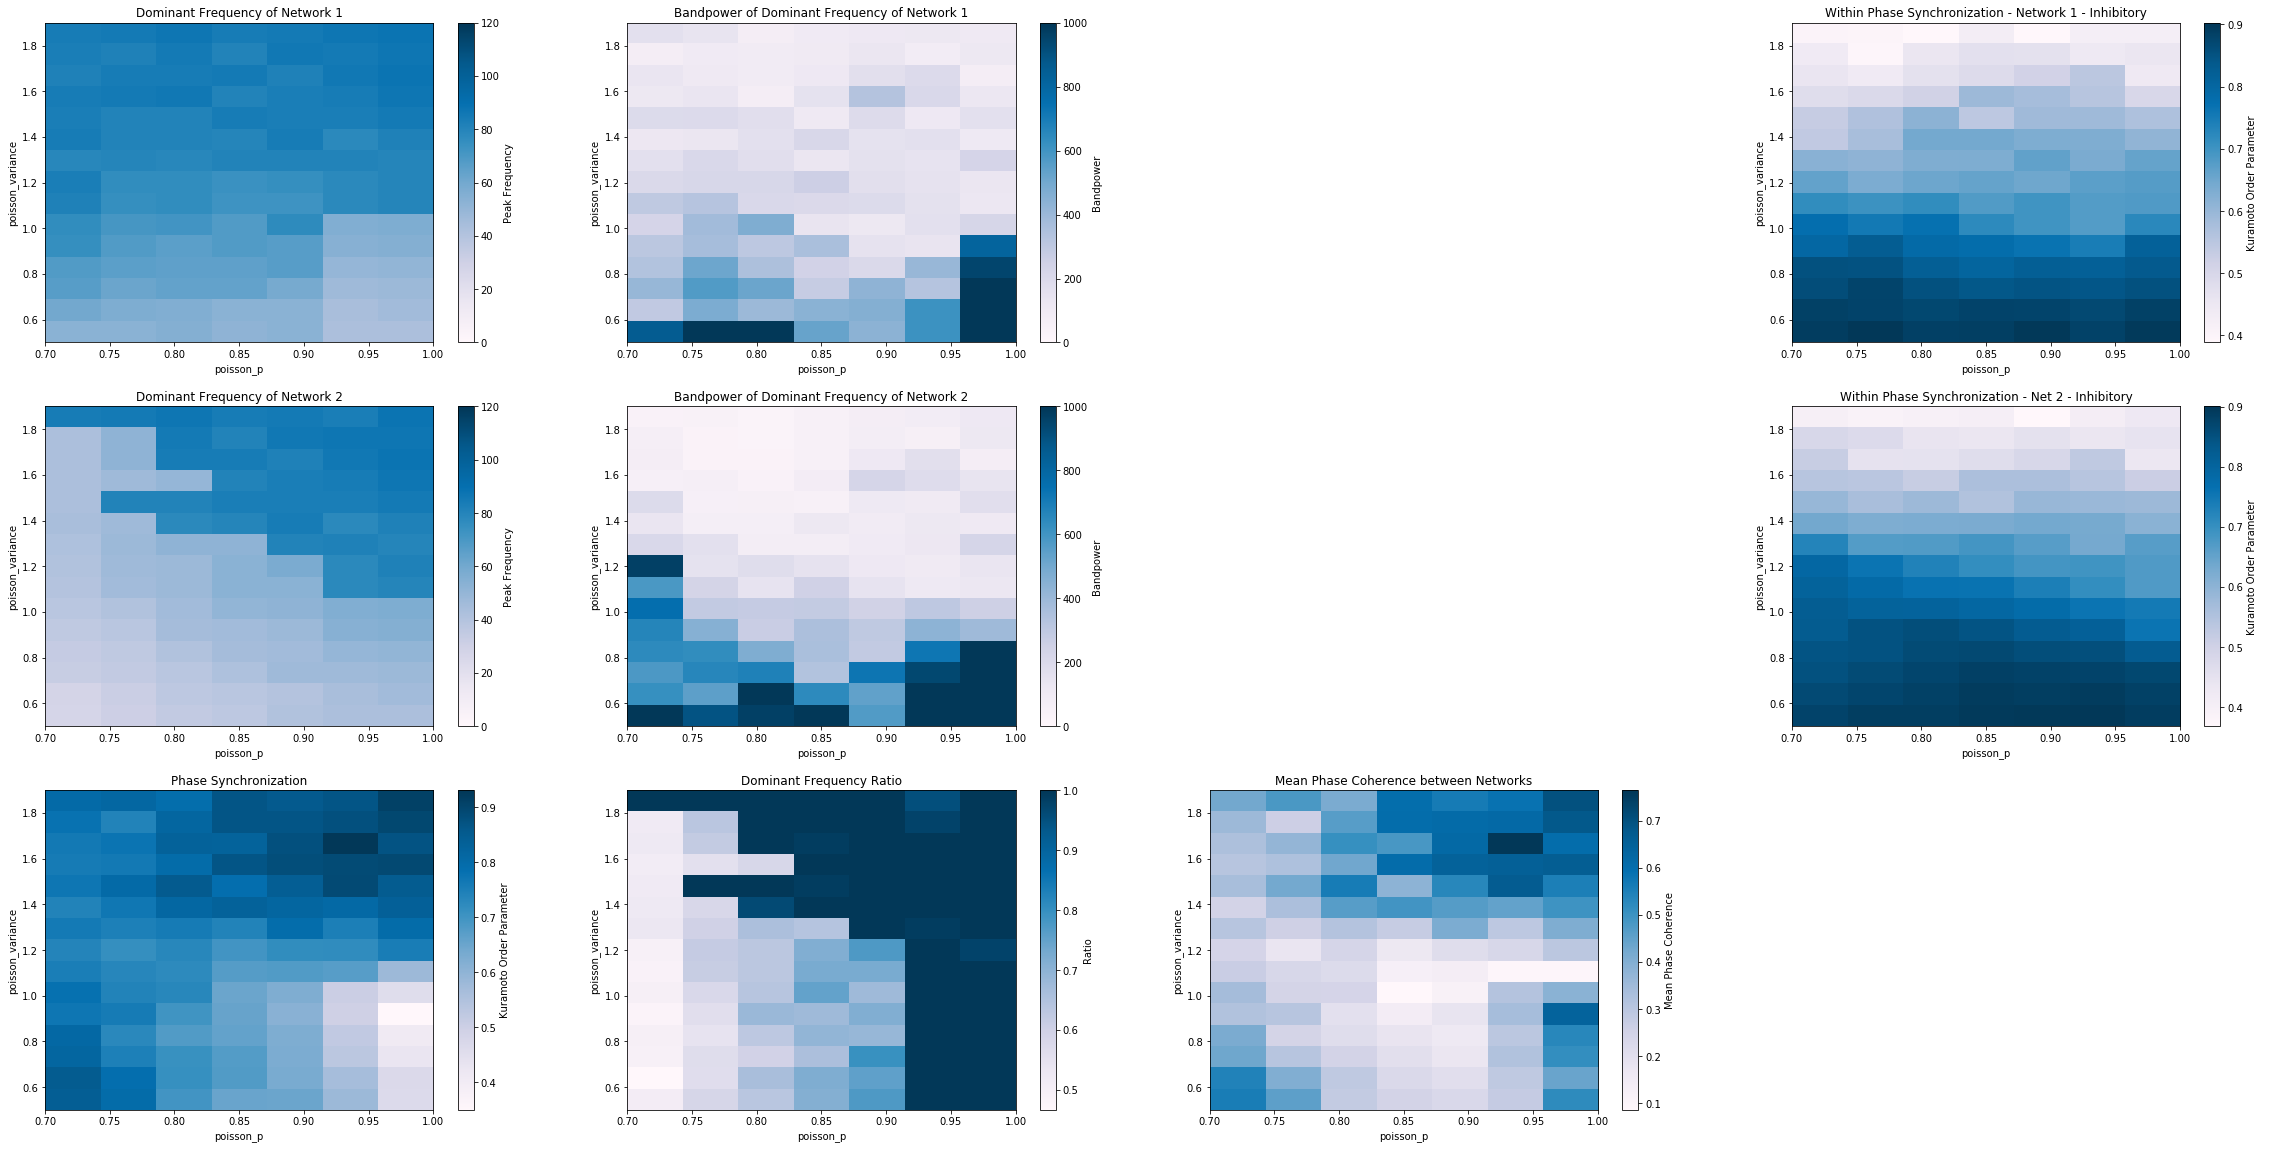

In [38]:
plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None)

(<Figure size 720x576 with 8 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1339f5dd0>,
       dtype=object))

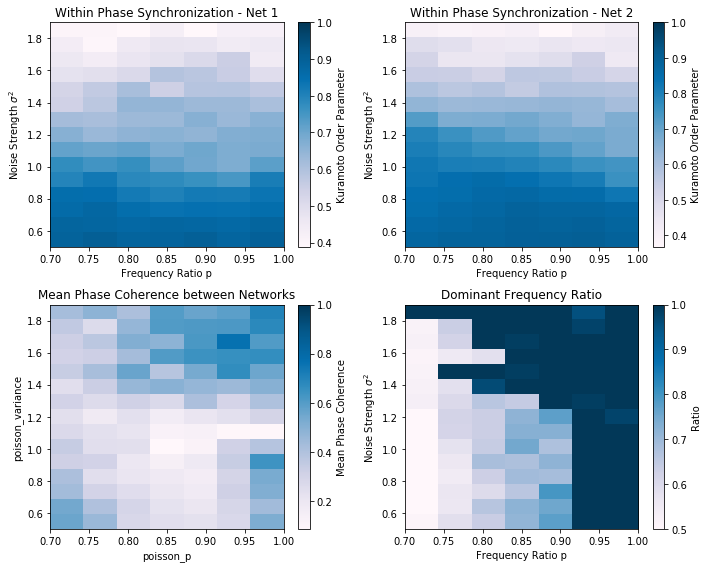

In [39]:
plots.plot_ING_exp_figure(ex, vmin_ratio=0.5, vmin_phase=None, vmax_phase=1)